<a href="https://colab.research.google.com/github/GuilhermeDeAssis123/DataScience/blob/master/Etapa_t%C3%A9cnica_Vitalk(An%C3%A1lise_de_leads).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Neste notebook iremos realizar a etapa técnica para a vaga de estágio em análise de dados para a área comercial na **Vitalk**. Empresa essa que cria soluções que possam ressignificar a relação das pessoas com a saúde mental, sempre utilizando embasamento científico e clínico. Atendem desde pequenas a grandes empresas, setor público e consumidor final.

>As suas soluções são completas, indo desde o mapeamento e entendimento das necessidades do indivíduo até o seu tratamento e acompanhamento. Cuidam da saúde mental de ponta a ponta.

<img src='https://www.vitalk.com.br/releases/vitalk-conversas-que-cuidam.png'>

> Dessa maneira tendo apresentado uma breve contextualização da empresa vamos seguir para a análise.

## 1. Importação das bibliotecas e dados.

In [170]:
# importando bibliotecas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from decimal import *

sns.set_style('darkgrid')

#carregando dados
df =  pd.read_csv('/content/Processo Seletivo Estágio - Vitalk - Página1.csv')

> Com as bibliotecas necessárias para realizar a análise de dados carregados, vamos agora verificar se todas as colunas foram carregadas de forma correta, e tambem ver como os dados se apresentam.

In [171]:
# mostrando 5 primeiras entradas
df.head()

,Negócio - ID,Negócio - Origem do Lead,Organização - Setor,Pessoa - Cargo,Organização - Quantos colaboradores tem a empresa,Negócio - Etapa,Negócio - Status,Negócio - MKT,Negócio - Negócio criado em,Negócio - Data de ganho,Negócio - Data de perda,Negócio - Valor,Negócio - Motivo da perda
0,1896,Inbound,NaN,NaN,NaN,Prospecção,Perdido,Referência | falarinspiravida.com.br,2021-01-04 09:34:56,NaN,2021-01-04 10:33:13,"0,00 BRL",Fora de SLA - Não é empresa
1,1897,Inbound,TI,CEO,0-50,Conexão,Perdido,Outros | ad,2021-01-04 09:41:02,NaN,2021-01-04 10:16:03,"0,00 BRL",Dados Incorretos
2,1898,Inbound,NaN,Loterica,101-500,Conexão,Perdido,Outros | ads,2021-01-04 09:51:06,NaN,2021-01-08 09:26:52,"0,00 BRL",Dados Incorretos/Incompletos
3,1899,Inbound,NaN,NaN,NaN,Conexão,Perdido,Outros | ads,2021-01-04 09:53:59,NaN,2021-01-06 15:31:21,"0,00 BRL",Dados Incorretos/Incompletos
4,1900,Inbound,Serviços de Educação,Analista de RH Pleno,51-100,Maturação,Perdido,NaN,2021-01-04 11:31:53,NaN,2021-07-08 10:49:21,"490,00 BRL",Encontrou outra solução


> Podemos notar que os dados forma carregados de forma correta, iremos olhar agora para o volume de dados que estamos lidando, e por consequência começar a análise explorátoria dos dados.

## 2. Análise exploratória.

> Nesta etapa vamos entrar a fundo nos dados para descobrir padrões e retirar *insights* que venham ser importantes durantes a tomada de decisão do gestor.


In [172]:
# dimensões do dataframe.
df.shape

(1735, 13)

In [173]:
# Colunas presentes no dataframe.
df.columns

Index(['Negócio - ID', 'Negócio - Origem do Lead', 'Organização - Setor',
       'Pessoa - Cargo', 'Organização - Quantos colaboradores tem a empresa',
       'Negócio - Etapa', 'Negócio - Status', 'Negócio - MKT',
       'Negócio - Negócio criado em', 'Negócio - Data de ganho',
       'Negócio - Data de perda', 'Negócio - Valor',
       'Negócio - Motivo da perda'],
      dtype='object')

In [174]:
df.dtypes

Negócio - ID                                          int64
Negócio - Origem do Lead                             object
Organização - Setor                                  object
Pessoa - Cargo                                       object
Organização - Quantos colaboradores tem a empresa    object
Negócio - Etapa                                      object
Negócio - Status                                     object
Negócio - MKT                                        object
Negócio - Negócio criado em                          object
Negócio - Data de ganho                              object
Negócio - Data de perda                              object
Negócio - Valor                                      object
Negócio - Motivo da perda                            object
dtype: object

In [175]:
# Porcentagem de valores ausentes por coluna em ordem descrescente.
(df.isnull().sum()/df.shape[0]).sort_values(ascending= False)

Negócio - Data de ganho                              0.986167
Organização - Setor                                  0.638040
Negócio - Motivo da perda                            0.284726
Negócio - Data de perda                              0.284726
Pessoa - Cargo                                       0.037464
Negócio - MKT                                        0.033429
Organização - Quantos colaboradores tem a empresa    0.015562
Negócio - Origem do Lead                             0.001729
Negócio - Valor                                      0.000000
Negócio - Negócio criado em                          0.000000
Negócio - Status                                     0.000000
Negócio - Etapa                                      0.000000
Negócio - ID                                         0.000000
dtype: float64

> Agora que temos conhecimento dos atributos dos dados que estamos lidando podemos passar para responder as questões propostas, sabendo o que esperar dos dados.

### 2.1 Negócios.

#### 1 - Quantidade de Negócios criados por mês?

> Como o volume de négocios criados deve-se dar através dos meses vamos separar o campo data em um campo `mes` para que facilite a crição do gráfico. Para isso como foi visto anteriormentes, a coluna `Negócio - Negócio criado em` é do tipo objeto, e para podermos separa-la em uma coluna com o valor do mês, precisamos trocar seu tipo para `datetime`

In [176]:
df['Negócio - Negócio criado em'] = pd.to_datetime(df['Negócio - Negócio criado em']) 

> Como pode-se notar acima a transformação foi feita com sucesso. Vamos agora realizar a separação.

In [177]:
df['data - Negócio criado em'] = df['Negócio - Negócio criado em'].dt.date
df['mes - Negócio criado em'] = df['Negócio - Negócio criado em'].dt.month

> Acima criamos duas novas colunas, sendo as **datas e meses** dos negóicos criados para facilitar o plot do gráfico e também renomeou-se os meses para seus respcetivos nomes

In [178]:
df_A = (df['mes - Negócio criado em'].value_counts()).reset_index().sort_values(['index'])
df_A.set_index('index',inplace=True)
df_A

,mes - Negócio criado em
index,
1,89
2,105
3,185
4,198
5,133
6,132
7,222
8,554
9,117


> Acima pode-se observar a frêquencia de negócios criados em cada mês.

> Como podemos ver acima, a mudança foi realizada com sucesso, vamos seguir para o plot do gráfico.

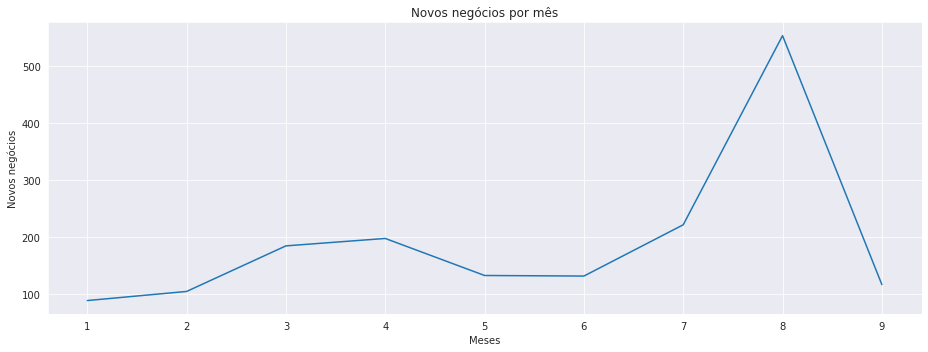

In [179]:
# plotar o número de negócios criados.
fig, ax = plt.subplots(figsize=(13,5))

(df_A['mes - Negócio criado em']).plot(kind="line", ax=ax)
ax.set_title("Novos negócios por mês")
ax.set_ylabel("Novos negócios")
ax.set_xlabel("Meses")


plt.tight_layout()

>Como pode-se observar houve um pico de negócios criado durante o mês de Agosto. Agora podemos seguir para a segunda questão

###2.2 Evolução mensal (quantidade) dos principais setores das organizações que chegaram.

> Vamos considerar aqui como mais importantes os 5 setores que mais tiveram frequencia no dataframe, com excessão do setor `outros` que são a soma de muitos outros setore. Vamos verificar quais são:

In [180]:
(df['Organização - Setor'].value_counts()).head(6)

Outros                  192
TI                       69
Serviços de Saúde        42
Consultoria              35
Serviços de Educação     34
Serviços Financeiros     31
Name: Organização - Setor, dtype: int64

> Checa-se acima os principais setores. Abaixo vamos verificar quantos projetos foram criados por mês para cada um dos 5 setores selecionados acima:

In [181]:
#df[df['Organização - Setor']=="TI"]['mes - Negócio criado em'].value_counts()
#df[df['Organização - Setor']=="Serviços de Saúde"]['mes - Negócio criado em'].value_counts()
#df[df['Organização - Setor']=="Consultoria"]['mes - Negócio criado em'].value_counts()
#df[df['Organização - Setor']=="Serviços de Educação"]['mes - Negócio criado em'].value_counts()
df[df['Organização - Setor']=="Serviços Financeiros"]['mes - Negócio criado em'].value_counts()

7    12
8    11
6     4
3     2
5     1
4     1
Name: mes - Negócio criado em, dtype: int64

In [182]:
df_b = (df[df['Organização - Setor']=="TI"]['mes - Negócio criado em'].value_counts()).reset_index().sort_values(['index'])
df_b.set_index('index',inplace=True)
df_b.rename(columns={'mes - Negócio criado em':"TI"},inplace=True)

df_c = (df[df['Organização - Setor']=="Serviços de Saúde"]['mes - Negócio criado em'].value_counts()).reset_index().sort_values(['index'])
df_c.set_index('index',inplace=True)
df_c.rename(columns={'mes - Negócio criado em':"Serviços de Saúde"},inplace=True)

df_d = (df[df['Organização - Setor']=="Consultoria"]['mes - Negócio criado em'].value_counts()).reset_index().sort_values(['index'])
df_d.set_index('index',inplace=True)
df_d.rename(columns={'mes - Negócio criado em':"Consultoria"},inplace=True)

df_e = (df[df['Organização - Setor']=="Serviços de Educação"]['mes - Negócio criado em'].value_counts()).reset_index().sort_values(['index'])
df_e.set_index('index',inplace=True)
df_e.rename(columns={'mes - Negócio criado em':"Serviços de Educação"},inplace=True)

df_f = (df[df['Organização - Setor']=="Serviços Financeiros"]['mes - Negócio criado em'].value_counts()).reset_index().sort_values(['index'])
df_f.set_index('index',inplace=True)
df_f.rename(columns={'mes - Negócio criado em':"Serviços Financeiros"},inplace=True)


> Na celula acima separamos os dados que queremos visualizar no gráfico, ou seja, os négocios criados por mês em cada um dos setores, separando-os dessa forma é mais fácil realizar o plot do gráfico de todos os setores na mesma figura. Veja na celula abaixo.

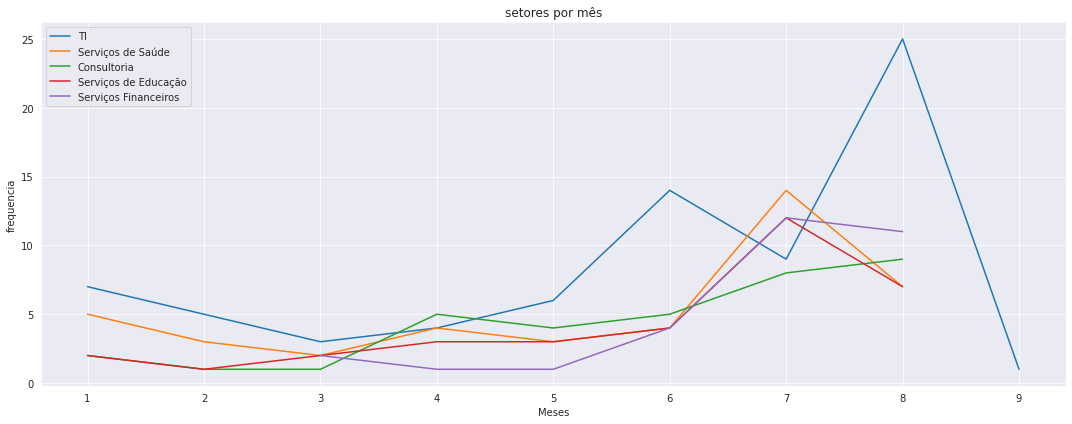

In [183]:
}# plotar setores mais frequentes.
fig, ax = plt.subplots(figsize=(15,6))

(df_b['TI']).plot(kind="line", ax=ax)
(df_c['Serviços de Saúde']).plot(kind="line", ax=ax)
(df_d['Consultoria']).plot(kind="line", ax=ax)
(df_e['Serviços de Educação']).plot(kind="line", ax=ax)
(df_f['Serviços Financeiros']).plot(kind="line", ax=ax)

ax.set_title("setores por mês")
ax.set_ylabel("frequencia")
ax.set_xlabel("Meses")

plt.legend()
plt.tight_layout()

> Podemos observar que durante quase todos os meses o setor de `TI` foi o que mais relizou projetos, além disso foi o unico que realizou projetos no mês de `setembro`. Em contra partida o setor `financeiro` realizou menos projetos, porém teve uma grande crescente a partir de `maio`.

### 2.3 Evolução mensal (quantidade) dos principais cargos dos leads que chegaram.

> Aqui vamos seguir o mesmo raciocinio da questão anterior, vamos selecionar os 5 cargos com mais frequencia de aparição com excessão de `outros` que representa cargos diversos.

In [184]:
(df['Pessoa - Cargo'].value_counts()).head(6)

Analista de RH          383
Outro                   333
Gerente de RH           205
CEO                     134
Coordenador(a) de RH    126
Autônomo                 74
Name: Pessoa - Cargo, dtype: int64

> Acima checa-se os cargos mais aparentes no conjunto de dados relacionados aos *leads* que chegaram.

In [185]:
#df[df['Pessoa - Cargo']=="Analista de RH"]['mes - Negócio criado em'].value_counts()
#df[df['Pessoa - Cargo']=="Gerente de RH"]['mes - Negócio criado em'].value_counts()
#df[df['Pessoa - Cargo']=="CEO"]['mes - Negócio criado em'].value_counts()
#df[df['Pessoa - Cargo']=="Coordenador(a) de RH"]['mes - Negócio criado em'].value_counts()
df[df['Pessoa - Cargo']=="Autônomo"]['mes - Negócio criado em'].value_counts()

8    26
7    10
9     8
3     8
2     8
6     5
4     5
5     3
1     1
Name: mes - Negócio criado em, dtype: int64

> Como feito na questão anterior na celular acima pode-se obter os leads que chegaram em cada um dos meses, relacionados aos cargos mais recorrentes. Dessa forma seguindo o mesmo raciocinio para resolver a questão, vamos selecionar os dados relevantes para essa pergunta, ou seja, o cargo dos *leads*, quando chegaram e a frequencia com que chegam, para depois plotar o gráfico.

In [186]:
df_b = (df[df['Pessoa - Cargo']=="Analista de RH"]['mes - Negócio criado em'].value_counts()).reset_index().sort_values(['index'])
df_b.set_index('index',inplace=True)
df_b.rename(columns={'mes - Negócio criado em':"Analista de RH"},inplace=True)

df_c = (df[df['Pessoa - Cargo']=="Gerente de RH"]['mes - Negócio criado em'].value_counts()).reset_index().sort_values(['index'])
df_c.set_index('index',inplace=True)
df_c.rename(columns={'mes - Negócio criado em':"Gerente de RH"},inplace=True)

df_d = (df[df['Pessoa - Cargo']=="CEO"]['mes - Negócio criado em'].value_counts()).reset_index().sort_values(['index'])
df_d.set_index('index',inplace=True)
df_d.rename(columns={'mes - Negócio criado em':"CEO"},inplace=True)

df_e = (df[df['Pessoa - Cargo']=="Coordenador(a) de RH"]['mes - Negócio criado em'].value_counts()).reset_index().sort_values(['index'])
df_e.set_index('index',inplace=True)
df_e.rename(columns={'mes - Negócio criado em':"Coordenador(a) de RH"},inplace=True)

df_f = (df[df['Pessoa - Cargo']=="Autônomo"]['mes - Negócio criado em'].value_counts()).reset_index().sort_values(['index'])
df_f.set_index('index',inplace=True)
df_f.rename(columns={'mes - Negócio criado em':"Autônomo"},inplace=True)


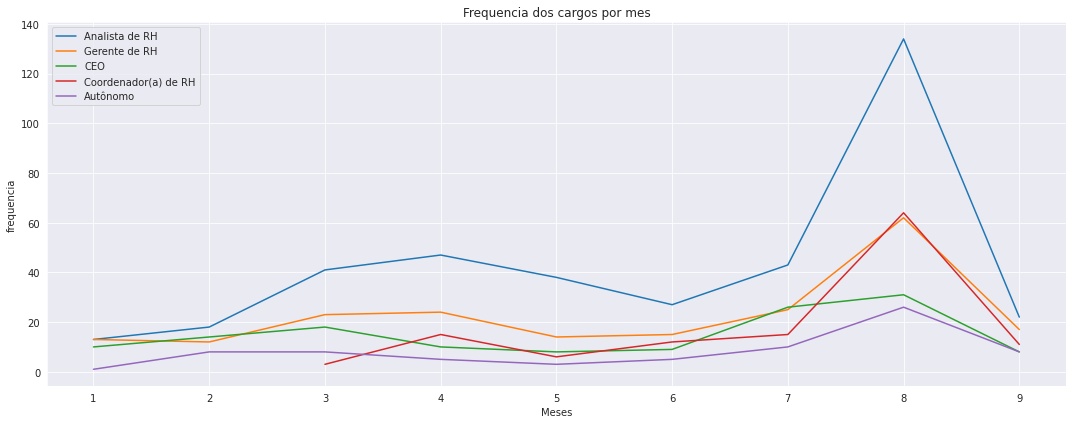

In [187]:
# plotar cargos mais frequentes.
fig, ax = plt.subplots(figsize=(15,6))

(df_b['Analista de RH']).plot(kind="line", ax=ax)
(df_c['Gerente de RH']).plot(kind="line", ax=ax)
(df_d['CEO']).plot(kind="line", ax=ax)
(df_e['Coordenador(a) de RH']).plot(kind="line", ax=ax)
(df_f['Autônomo']).plot(kind="line", ax=ax)

ax.set_title("Frequencia dos cargos por mes")
ax.set_ylabel("frequencia")
ax.set_xlabel("Meses")

plt.legend()
plt.tight_layout()

> Como podemos observar, esse gráfico seguiu o comportamento do gráfico de negócios criado e dos setores mais frequentes, isso se deve por causa do aumento de projetos, quanto mais, projetos, mais setores e *leads* estarão envolvidos, assim sendo tendo o pico de atividade máxima em `agosto`. Neste gráfico o principal cargo representado foi `Analista de RH`.Agora vamos seguir para a próxima questão em busca de novos *insghts*.

## Ganhos
### 3.1 Quantos negócios foram fechados por mês?

> Primeiramente vamos ver quantos negócios foram fechados no total:


In [188]:
df[df['Negócio - Status'] =='Ganho'].shape[0]

24

> Vemos que o número total de negócios fechados foi de `24`. Agora vamos olhar como esse número de distribuiu durante os 9 meses presentes no *dataset*.

In [240]:
df['Negócio - Data de ganho'] = pd.to_datetime(df['Negócio - Data de ganho']) 
df['mes - Data de Ganho'] = df['Negócio - Data de ganho'].dt.month

In [241]:
df[df['Negócio - Status'] =='Ganho']['mes - Data de Ganho'].value_counts()

8.0    6
7.0    4
4.0    4
5.0    3
6.0    3
3.0    3
9.0    1
Name: mes - Data de Ganho, dtype: int64

In [242]:
df_b = (df[df['Negócio - Status'] =='Ganho']['mes - Data de Ganho'].value_counts()).reset_index().sort_values(['index'])
df_b.set_index('index',inplace=True)
df_b.rename(columns={'mes - Data de Ganho':"Ganho"},inplace=True)

> Acima vemos como os negócios fechados de distribuiram através dos `9 meses`, na esqueda temos o número do mês, e na direita o volume de negócios concretizados, em ordem `decrescente`. Já na segunda celula realizamos a seleção dos dados necessários para construir o gráfico de ganhos mensais.

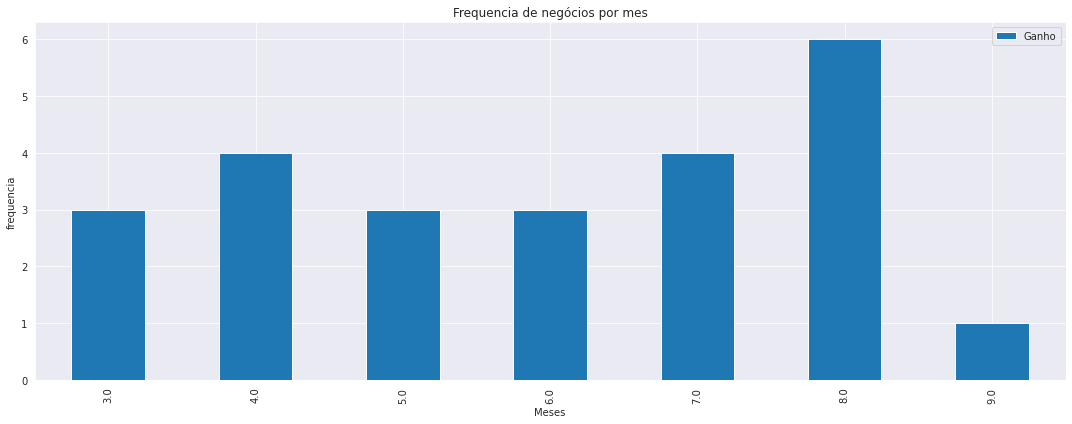

In [243]:
# plotar cargos mais frequentes.
fig, ax = plt.subplots(figsize=(15,6))

(df_b['Ganho']).plot(kind="bar", ax=ax)

ax.set_title("Frequencia de negócios por mes")
ax.set_ylabel("frequencia")
ax.set_xlabel("Meses")

plt.legend()
plt.tight_layout()

> Como podemos observar nesse gráfico o mês que teve maior volume de projetos fechados foi o `Agosto`, com `6 negócios fechados`. Em contra partida os mês `setembro` foi os mês com **menos** negócios fechados. `janeiro` e `abril` não contabilizaram negócios fechados.

### 3.2 Qual o valor total vendido mensalmente?

Aqui vamos realizar alguns tratamentos nos dados devido os valores monetários serem do tipo `object`. Teremos de trata-los retirando virgulas e caracteres que não podem ser convetidos, como a sigla `BRL` e depois transforma-los em números do tipo `float`.

In [244]:
df_2 = df[df['Negócio - Status']=='Ganho'][['Negócio - Valor','mes - Data de Ganho']].reset_index()
df_2.drop(['index'], axis=1, inplace=True)

In [245]:
df_2

,Negócio - Valor,mes - Data de Ganho
0,"350,00 BRL",3.0
1,"1.200,00 BRL",6.0
2,"350,00 BRL",5.0
3,"630,00 BRL",3.0
4,"350,00 BRL",4.0
5,"350,00 BRL",4.0
6,"700,00 BRL",3.0
7,"830,00 BRL",4.0
8,"2.490,00 BRL",8.0
9,"350,00 BRL",4.0


> Acima encontram-se os valores dos 24 negócio que foram fechados e seu respectivo mês. Como citado anteriormente, é necessário realizar transformações nos dados da colunas `[Negócio-Valor]`, vamos fazer isso agora.

In [246]:
valor = []
for row in df_2['Negócio - Valor']:
  row = row.replace(" BRL","")
  row = row.replace(",",".")
  
  if row == "1.200.00":
    row = row.replace("1.200.00","1200.00")
  if row == "2.490.00":
    row = row.replace("2.490.00","2490.00")
  if row == "1.062.50":
    row = row.replace("1.062.50","1062.50")
  if row == "1.541.66":
    row = row.replace("1.541.66","1541.66")
  if row == "1.234.33":
    row = row.replace("1.234.33","1234.33")
  if row == "1.250.00":
    row = row.replace("1.250.00","1250.00")
  if row == "1.950.00":
    row = row.replace("1.950.00","1950.00")
  valor.append(float(row))

> Na celula acima o códgio esta retirando a sigla `BRL` dos valores e substituindo as virgulas por pontos, dessa maneira os valores podem ser convertidos para números do tipo `float` de modo que podemos operar com esses números. Vamos agora olhar para a renda mensal entregue por esses negócios.

In [248]:
df_2['Negócio - Valor'] = valor
(df_2['Negócio - Valor'].groupby(df_2['mes - Data de Ganho'])).sum()

mes - Data de Ganho
3.0    1680.00
4.0    1880.00
5.0    2954.16
6.0    3134.33
7.0    2352.90
8.0    6412.01
9.0    1250.00
Name: Negócio - Valor, dtype: float64

> Acima vemos a renda distribuida mensalmente. Vamos análisar esse ganha em um gráfico de barras.

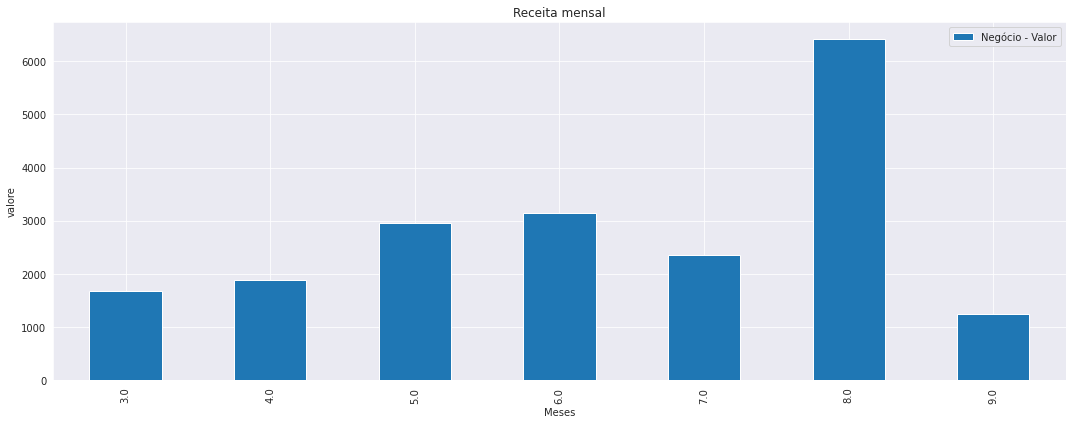

In [249]:
# plotar receita mensal.
fig, ax = plt.subplots(figsize=(15,6))

((df_2['Negócio - Valor'].groupby(df_2['mes - Data de Ganho'])).sum()).plot(kind="bar", ax=ax)

ax.set_title("Receita mensal")
ax.set_ylabel("valore")
ax.set_xlabel("Meses")

plt.legend()
plt.tight_layout()

> Como era de se esperar o mês de `agosto` que teve o maior número de negócios fechados, possui a maior renda, superandos os `6 mil reais`.

### 3.3 principais setores vendidos.
> Como não foi especificado nessa questão, vamos olhar os setores mais vendidos de duas óticas diferentes, os setores que mais fecharam negócio, ou seja, setores que mais compraram da Vitalk e setores que movimentaram maior renda.

Assim sendo:

*  Setores com mais projetos comprados.
*  Setores que renderam mais dinheiro a Vitalk.

> Da mesma forma na questão anterior teremos de tratar os valores monetários.

In [197]:
df_3 = df[df['Negócio - Status']=="Ganho"][['Organização - Setor','Negócio - Valor']]
df_3

,Organização - Setor,Negócio - Valor
57,TI,"350,00 BRL"
186,Serviços de Saúde,"1.200,00 BRL"
195,ONG,"350,00 BRL"
196,Capital de risco e participações privadas,"630,00 BRL"
241,TI,"350,00 BRL"
256,Serviços Financeiros,"350,00 BRL"
292,Indústria,"700,00 BRL"
320,Empresa Pública,"830,00 BRL"
329,NaN,"2.490,00 BRL"
354,Indústria Química,"350,00 BRL"


In [198]:
valor = []
for row in df_3['Negócio - Valor']:
  row = row.replace(" BRL","")
  row = row.replace(",",".")
  
  if row == "1.200.00":
    row = row.replace("1.200.00","1200.00")
  if row == "2.490.00":
    row = row.replace("2.490.00","2490.00")
  if row == "1.062.50":
    row = row.replace("1.062.50","1062.50")
  if row == "1.541.66":
    row = row.replace("1.541.66","1541.66")
  if row == "1.234.33":
    row = row.replace("1.234.33","1234.33")
  if row == "1.250.00":
    row = row.replace("1.250.00","1250.00")
  if row == "1.950.00":
    row = row.replace("1.950.00","1950.00")
  valor.append(float(row))

In [199]:
df_3['Negócio - Valor'] = valor
df_3

,Organização - Setor,Negócio - Valor
57,TI,350.00
186,Serviços de Saúde,1200.00
195,ONG,350.00
196,Capital de risco e participações privadas,630.00
241,TI,350.00
256,Serviços Financeiros,350.00
292,Indústria,700.00
320,Empresa Pública,830.00
329,NaN,2490.00
354,Indústria Química,350.00


> Como pode ser visto, na celula acima os valores ja se encontram tratados e tambem ja sabemos quanto cada setor gastou em cada projeto vendido pela Vitalk.

In [200]:
df_3['Negócio - Valor'].groupby(df_3['Organização - Setor']).sum()

Organização - Setor
Capital de risco e participações privadas     630.00
Comércio                                     1250.00
Consultoria                                   490.00
Empresa Pública                               830.00
Indústria                                     700.00
Indústria Química                             912.50
ONG                                           350.00
Outros                                       5197.23
Petróleo e energia                            700.00
Publicidade e MKT                             420.00
Serviços Financeiros                          950.00
Serviços de Saúde                            1200.00
TI                                           2002.01
Varejo                                       1541.66
Name: Negócio - Valor, dtype: float64

> Na celula acima, temos o valor total que cada setor gastou juntando todos os projetos realizados, vamos análisar isso em um gráfico de barras na ordem decrescente.

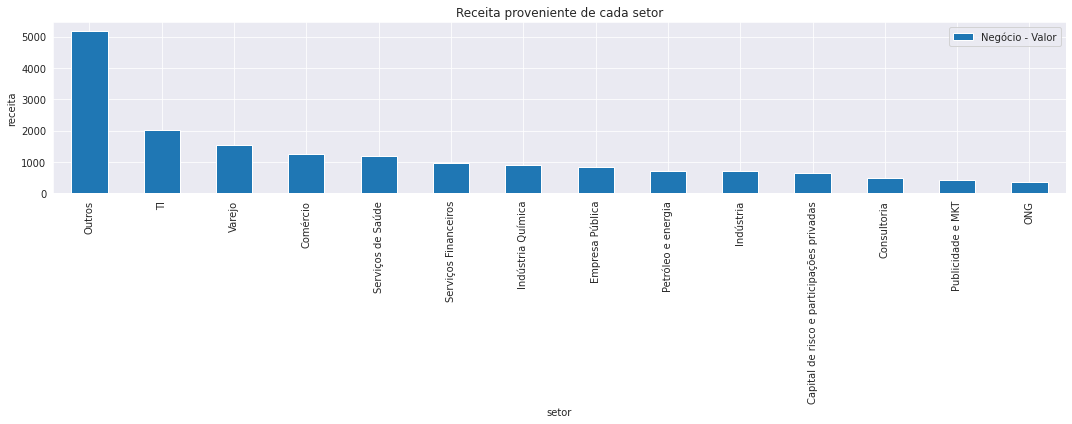

In [201]:
# plotar receita mensal.
fig, ax = plt.subplots(figsize=(15,6))

((df_3['Negócio - Valor'].groupby(df_3['Organização - Setor']).sum()).sort_values(ascending = False)).plot(kind="bar", ax=ax)

ax.set_title("Receita proveniente de cada setor")
ax.set_ylabel("receita")
ax.set_xlabel("setor")

plt.legend()
plt.tight_layout()

> `Outros`, que são mistura de alguns outros setores, foram os maiores compradores da Vitalk com um valor superior a `5 mil reais`, seguidos por `TI`,`Varejo` e `Comercio`. Agora que vimos a visão do maior volume de dinheiro, vamos ver os setores qua mais fecharam projetos.

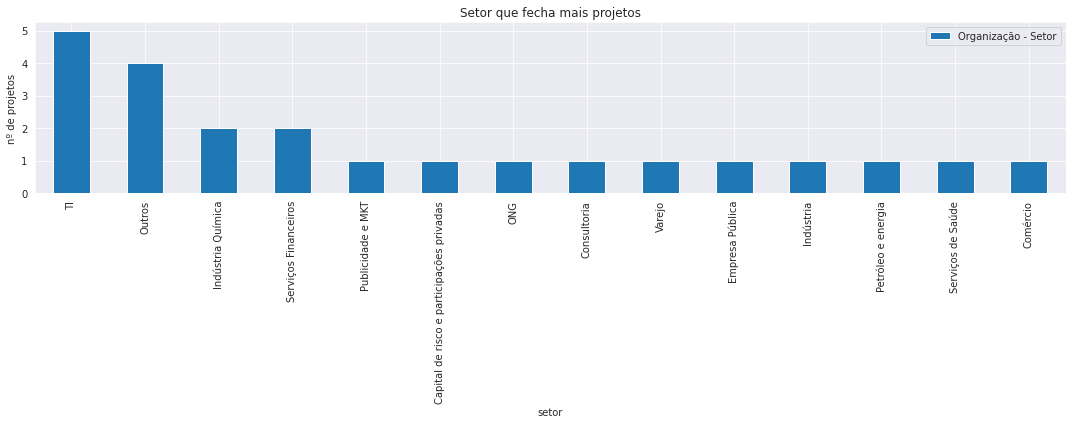

In [202]:
# plotar receita mensal.
fig, ax = plt.subplots(figsize=(15,6))

((df_3['Organização - Setor'].value_counts()).sort_values(ascending = False)).plot(kind="bar", ax=ax)

ax.set_title("Setor que fecha mais projetos")
ax.set_ylabel("nº de projetos")
ax.set_xlabel("setor")

plt.legend()
plt.tight_layout()

> Observa-se que `TI` passa a frente de `Outros`, como maior contrante da vitalk, assim assumindo a primeira posição.

## 3. Perdas
> Aqui nos chegamos na ultima questão, vamos agora olhar para as perdas.

### 3.1 Quantidade de Negócio perdido por mês.

> Seguindo o raciocinio da primeira questão, vamos criar uma variável a respeito do `mês de perda`, que vai nos auxiliar na construção do gráfico, para isso temos que transformar a coluna `negócio - data de perda` para o tipo `datetime`. Assim poderemos extrair apenas o mês de toda a data

In [203]:
df['Negócio - Data de perda'] = pd.to_datetime(df['Negócio - Data de perda']) 

In [204]:
df['data - Data de perda'] = df['Negócio - Data de perda'].dt.date
df['mes - Data de perda'] = df['Negócio - Data de perda'].dt.month

> Nesta etapa a realização da transformção ja foi concluida. Agora podemos ver o volume de projetos perdidos por mês:

In [205]:
df_C = (df['mes - Data de perda'].value_counts()).reset_index().sort_values(['index'])
df_C.set_index('index',inplace=True)
df_C

,mes - Data de perda
index,
1.0,20
2.0,77
3.0,106
4.0,98
5.0,85
6.0,103
7.0,204
8.0,400
9.0,148


> Acima vemos a quantidade de projeto perdidos à direita, e o mês à esqueda. Vamos ver isso em um gráfico:


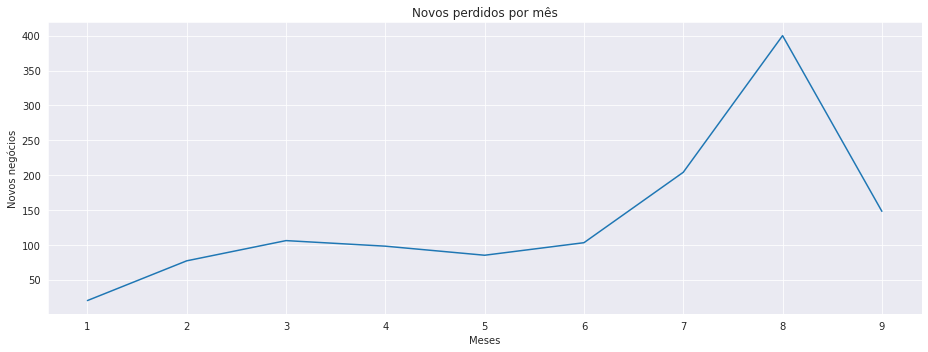

In [206]:
# plotar o número de negócios negocios perdidos.
fig, ax = plt.subplots(figsize=(13,5))

(df_C['mes - Data de perda']).plot(kind="line", ax=ax)
ax.set_title("Novos perdidos por mês")
ax.set_ylabel("Novos negócios")
ax.set_xlabel("Meses")


plt.tight_layout()

> Seguiu o padrão esperado, uma vez que o maior volume de contatos com os *leads* foi no mês de agosto. Maior volume de *leads*, representa mais cargos, mais setores, maiores ganhos, mas também maiores perdas, lembrando que o precesso de vendas se trata de um "funil de vendas". Porém, será que tivemos mais projetos criados ou mais projetos perdidos? Vamos ver isso no gráfico abaixo:

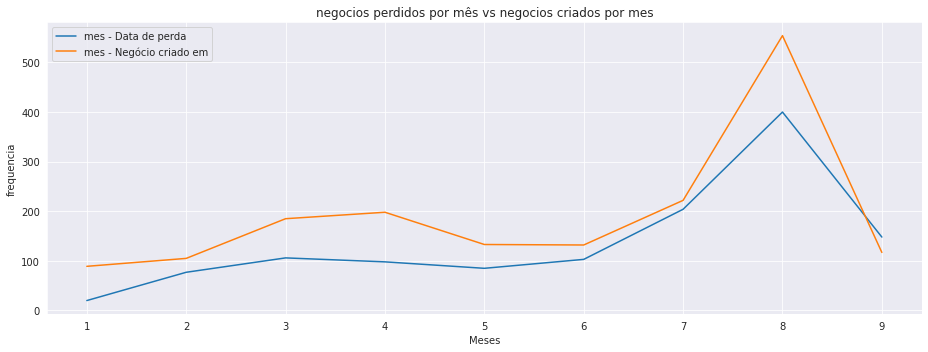

In [207]:
# plotar o número de negócios negocios perdidos vs negocios criados.
fig, ax = plt.subplots(figsize=(13,5))

(df_C['mes - Data de perda']).plot(kind="line", ax=ax)
(df_A['mes - Negócio criado em']).plot(kind="line", ax=ax)
ax.set_title("negocios perdidos por mês vs negocios criados por mes")
ax.set_ylabel('frequencia')
ax.set_xlabel("Meses")

plt.legend()
plt.tight_layout()

> Podemos ver que durante os `9 meses`, o unico momento que houve maior número de perdas do que projetos criados foi em `setembro`. Em `Abril` foram criados 
**100%** mais projetos do que foram perdidos, ou seja o dobro.

### 3.2 Quais os 3 principais motivos de perda por etapa por mês?

> Por se tratar de muitas etapas e muitos gráficos essa será uma parte um pouco extensa. Dessa maneira vamos avançar através de sub-tópicos para análisar cada uma das etapas.

In [208]:
df_4 = df[['Negócio - Motivo da perda','mes - Data de perda','Negócio - Etapa']]
df_4

,Negócio - Motivo da perda,mes - Data de perda,Negócio - Etapa
0,Fora de SLA - Não é empresa,1.0,Prospecção
1,Dados Incorretos,1.0,Conexão
2,Dados Incorretos/Incompletos,1.0,Conexão
3,Dados Incorretos/Incompletos,1.0,Conexão
4,Encontrou outra solução,7.0,Maturação
...,...,...,...
1730,NaN,NaN,A Trabalhar
1731,NaN,NaN,A Trabalhar
1732,NaN,NaN,A Trabalhar
1733,NaN,NaN,Prospecção


####3.2.1 A Trabalhar.

> Vamos começar com a primeira etapa do processo. Para isso vamos separar os dados referentes a essa etapa somente. Vamos seguir esse raciocinio em todas as etapas do processo de venda.

In [209]:
df_A_Trabalhar = df_4[df_4['Negócio - Etapa']=='A Trabalhar']
df_A_Trabalhar

,Negócio - Motivo da perda,mes - Data de perda,Negócio - Etapa
30,NaN,NaN,A Trabalhar
32,NaN,NaN,A Trabalhar
35,NaN,NaN,A Trabalhar
46,NaN,NaN,A Trabalhar
47,NaN,NaN,A Trabalhar
...,...,...,...
1728,NaN,NaN,A Trabalhar
1729,NaN,NaN,A Trabalhar
1730,NaN,NaN,A Trabalhar
1731,NaN,NaN,A Trabalhar


In [210]:
(df_A_Trabalhar['Negócio - Motivo da perda'].groupby(df_A_Trabalhar['mes - Data de perda'])).value_counts()[29:30]

mes - Data de perda  Negócio - Motivo da perda      
9.0                  Não tinha interesse no programa    24
Name: Negócio - Motivo da perda, dtype: int64

> Acima é apenas uma verificação para ver se os dados foram selecionados corretamente. Acima vemos que no mês 9, o motivo `Não tinha interesse no programa` foi citado `24` vezes. Vamos agora acompanhar o principais motivos de desistência relacionada a essa etapa durante os `9 meses`. Por serem muitos gráficos vamos separa-los em duas células diferentes.

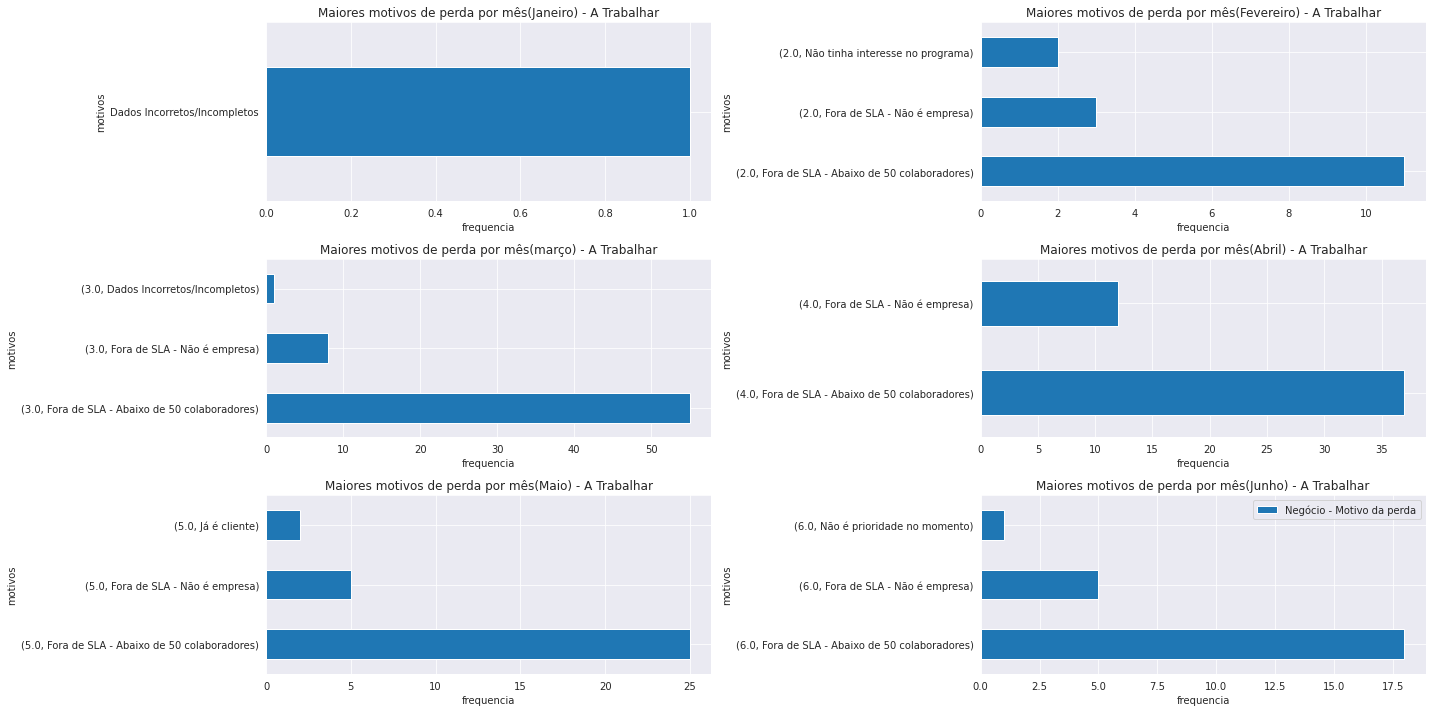

In [211]:
# plotar receita mensal.
fig, ((ax,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(20,10))


((df_A_Trabalhar['Negócio - Motivo da perda'].groupby(df_A_Trabalhar['mes - Data de perda'])).value_counts()[1]).plot(kind="barh", ax=ax)
((df_A_Trabalhar['Negócio - Motivo da perda'].groupby(df_A_Trabalhar['mes - Data de perda'])).value_counts()[1:4]).plot(kind="barh", ax=ax2)
((df_A_Trabalhar['Negócio - Motivo da perda'].groupby(df_A_Trabalhar['mes - Data de perda'])).value_counts()[4:7]).plot(kind="barh", ax=ax3)
((df_A_Trabalhar['Negócio - Motivo da perda'].groupby(df_A_Trabalhar['mes - Data de perda'])).value_counts()[8:10]).plot(kind="barh", ax=ax4)
((df_A_Trabalhar['Negócio - Motivo da perda'].groupby(df_A_Trabalhar['mes - Data de perda'])).value_counts()[10:13]).plot(kind="barh", ax=ax5)
((df_A_Trabalhar['Negócio - Motivo da perda'].groupby(df_A_Trabalhar['mes - Data de perda'])).value_counts()[15:18]).plot(kind="barh", ax=ax6)

ax.set_title("Maiores motivos de perda por mês(Janeiro) - A Trabalhar")
ax.set_xlabel("frequencia")
ax.set_ylabel("motivos")

ax2.set_title("Maiores motivos de perda por mês(Fevereiro) - A Trabalhar")
ax2.set_xlabel("frequencia")
ax2.set_ylabel("motivos")

ax3.set_title("Maiores motivos de perda por mês(março) - A Trabalhar")
ax3.set_xlabel("frequencia")
ax3.set_ylabel("motivos")

ax4.set_title("Maiores motivos de perda por mês(Abril) - A Trabalhar")
ax4.set_xlabel("frequencia")
ax4.set_ylabel("motivos")

ax5.set_title("Maiores motivos de perda por mês(Maio) - A Trabalhar")
ax5.set_xlabel("frequencia")
ax5.set_ylabel("motivos")

ax6.set_title("Maiores motivos de perda por mês(Junho) - A Trabalhar")
ax6.set_xlabel("frequencia")
ax6.set_ylabel("motivos")

plt.legend()
plt.tight_layout()

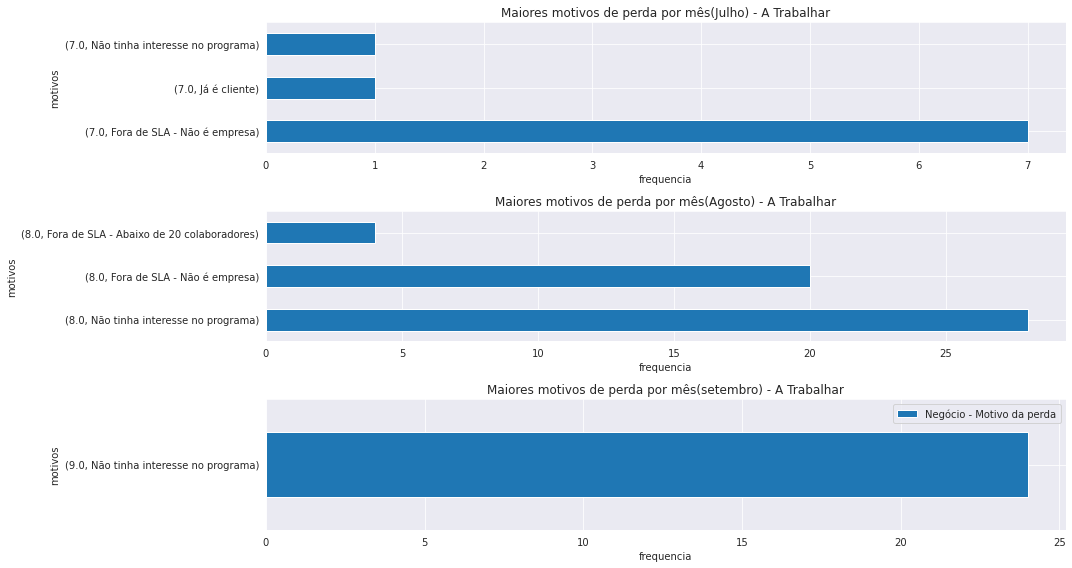

In [212]:
fig, ((ax7,ax8,ax9)) = plt.subplots(3,1,figsize=(15,8))

((df_A_Trabalhar['Negócio - Motivo da perda'].groupby(df_A_Trabalhar['mes - Data de perda'])).value_counts()[19:22]).plot(kind="barh", ax=ax7)
((df_A_Trabalhar['Negócio - Motivo da perda'].groupby(df_A_Trabalhar['mes - Data de perda'])).value_counts()[23:26]).plot(kind="barh", ax=ax8)
((df_A_Trabalhar['Negócio - Motivo da perda'].groupby(df_A_Trabalhar['mes - Data de perda'])).value_counts()[29:30]).plot(kind="barh", ax=ax9)

ax7.set_title("Maiores motivos de perda por mês(Julho) - A Trabalhar")
ax7.set_xlabel("frequencia")
ax7.set_ylabel("motivos")

ax8.set_title("Maiores motivos de perda por mês(Agosto) - A Trabalhar")
ax8.set_xlabel("frequencia")
ax8.set_ylabel("motivos")

ax9.set_title("Maiores motivos de perda por mês(setembro) - A Trabalhar")
ax9.set_xlabel("frequencia")
ax9.set_ylabel("motivos")

plt.legend()
plt.tight_layout()

> Nas celulas acima pode-se observar os principais motivos de desistência de realizar um projeto com a Vitalk na etapa `A Trabalhar` durante os `9 meses`. Observa-se que nem todas os meses tiverem 3 motivos como solicitado.

#### 3.2.2 Conexão

> Vamos realizar o mesmo processo agora para a etapa de `Conexão`. Primeiro vamos selecionar os dados referentes somente a essa etapa. Em seguida vamos contabilizar os motivos de desistência para essa etapa em cada um dos meses.

In [213]:
df_conexão = df_4[df_4['Negócio - Etapa']=='Conexão']
df_conexão

,Negócio - Motivo da perda,mes - Data de perda,Negócio - Etapa
1,Dados Incorretos,1.0,Conexão
2,Dados Incorretos/Incompletos,1.0,Conexão
3,Dados Incorretos/Incompletos,1.0,Conexão
13,Fora de SLA - Não é empresa,1.0,Conexão
17,Fora de SLA - Não é empresa,1.0,Conexão
...,...,...,...
1709,NaN,NaN,Conexão
1712,NaN,NaN,Conexão
1713,NaN,NaN,Conexão
1717,NaN,NaN,Conexão


In [214]:
(df_conexão['Negócio - Motivo da perda'].groupby(df_conexão['mes - Data de perda'])).value_counts()[4][1:4]

Negócio - Motivo da perda
Já é cliente                       2
Não tinha interesse no programa    1
Name: Negócio - Motivo da perda, dtype: int64

> Podemos ver que os dados foram selecionados da forma correta, acima pode-se verificar os motivos de desistência para o `mês 4`.

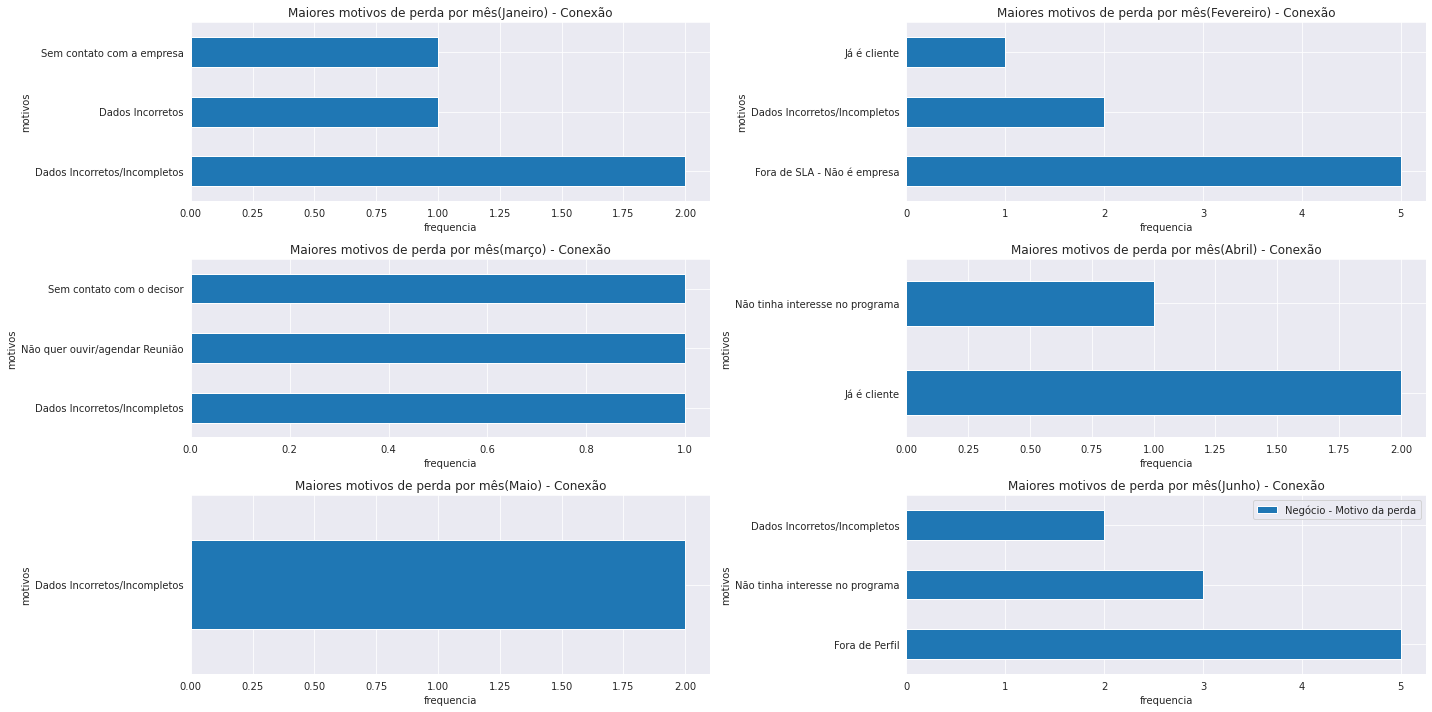

In [215]:
# plotar receita mensal.
fig, ((ax,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(20,10))


((df_conexão['Negócio - Motivo da perda'].groupby(df_conexão['mes - Data de perda'])).value_counts()[1][1:4]).plot(kind="barh", ax=ax)
((df_conexão['Negócio - Motivo da perda'].groupby(df_conexão['mes - Data de perda'])).value_counts()[2][1:4]).plot(kind="barh", ax=ax2)
((df_conexão['Negócio - Motivo da perda'].groupby(df_conexão['mes - Data de perda'])).value_counts()[3][1:4]).plot(kind="barh", ax=ax3)
((df_conexão['Negócio - Motivo da perda'].groupby(df_conexão['mes - Data de perda'])).value_counts()[4][1:4]).plot(kind="barh", ax=ax4)
((df_conexão['Negócio - Motivo da perda'].groupby(df_conexão['mes - Data de perda'])).value_counts()[5][1:4]).plot(kind="barh", ax=ax5)
((df_conexão['Negócio - Motivo da perda'].groupby(df_conexão['mes - Data de perda'])).value_counts()[6][1:4]).plot(kind="barh", ax=ax6)

ax.set_title("Maiores motivos de perda por mês(Janeiro) - Conexão")
ax.set_xlabel("frequencia")
ax.set_ylabel("motivos")

ax2.set_title("Maiores motivos de perda por mês(Fevereiro) - Conexão")
ax2.set_xlabel("frequencia")
ax2.set_ylabel("motivos")

ax3.set_title("Maiores motivos de perda por mês(março) - Conexão")
ax3.set_xlabel("frequencia")
ax3.set_ylabel("motivos")

ax4.set_title("Maiores motivos de perda por mês(Abril) - Conexão")
ax4.set_xlabel("frequencia")
ax4.set_ylabel("motivos")

ax5.set_title("Maiores motivos de perda por mês(Maio) - Conexão")
ax5.set_xlabel("frequencia")
ax5.set_ylabel("motivos")

ax6.set_title("Maiores motivos de perda por mês(Junho) - Conexão")
ax6.set_xlabel("frequencia")
ax6.set_ylabel("motivos")

plt.legend()
plt.tight_layout()

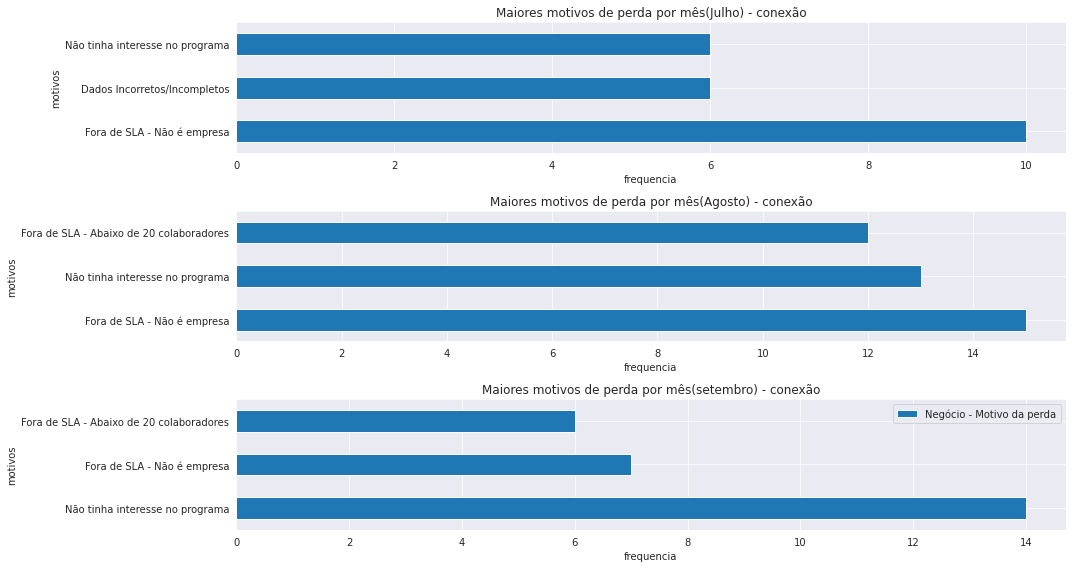

In [216]:
fig, ((ax7,ax8,ax9)) = plt.subplots(3,1,figsize=(15,8))

((df_conexão['Negócio - Motivo da perda'].groupby(df_conexão['mes - Data de perda'])).value_counts()[7][1:4]).plot(kind="barh", ax=ax7)
((df_conexão['Negócio - Motivo da perda'].groupby(df_conexão['mes - Data de perda'])).value_counts()[8][1:4]).plot(kind="barh", ax=ax8)
((df_conexão['Negócio - Motivo da perda'].groupby(df_conexão['mes - Data de perda'])).value_counts()[9][1:4]).plot(kind="barh", ax=ax9)

ax7.set_title("Maiores motivos de perda por mês(Julho) - conexão")
ax7.set_xlabel("frequencia")
ax7.set_ylabel("motivos")

ax8.set_title("Maiores motivos de perda por mês(Agosto) - conexão")
ax8.set_xlabel("frequencia")
ax8.set_ylabel("motivos")

ax9.set_title("Maiores motivos de perda por mês(setembro) - conexão")
ax9.set_xlabel("frequencia")
ax9.set_ylabel("motivos")

plt.legend()
plt.tight_layout()

> Nas celulas acima pode-se observar os principais motivos de desistência de realizar um projeto com a Vitalk na etapa `Conexão` durante os `9 meses`. Observa-se que nem todas os meses tiverem 3 motivos como solicitado.

#### 3.2.3 Prospecção

> Vamos realizar o mesmo processo agora para a etapa de `Prospecção`. Primeiro vamos selecionar os dados referentes somente a essa etapa. Em seguida vamos contabilizar os motivos de desistência para essa etapa em cada um dos meses.

In [217]:
df_pros = df_4[df_4['Negócio - Etapa']=='Prospecção']
df_pros

,Negócio - Motivo da perda,mes - Data de perda,Negócio - Etapa
0,Fora de SLA - Não é empresa,1.0,Prospecção
6,Fora de SLA - Abaixo de 30 colaboradores,1.0,Prospecção
14,Não quer ouvir/agendar Reunião,1.0,Prospecção
16,NaN,NaN,Prospecção
23,Sem contato com a empresa,1.0,Prospecção
...,...,...,...
1710,NaN,NaN,Prospecção
1711,NaN,NaN,Prospecção
1714,NaN,NaN,Prospecção
1733,NaN,NaN,Prospecção


In [218]:
(df_pros['Negócio - Motivo da perda'].groupby(df_pros['mes - Data de perda'])).value_counts()[4][1:4]

Negócio - Motivo da perda
Não quer ouvir/agendar Reunião           5
Sumiu depois da Prospecção (Ghosting)    4
Só quer parceria                         4
Name: Negócio - Motivo da perda, dtype: int64

> Acima pode-se encontrar a verificação de que os dados foram selecionados corretamente, observa-se os motivos para o mês de `abril`.

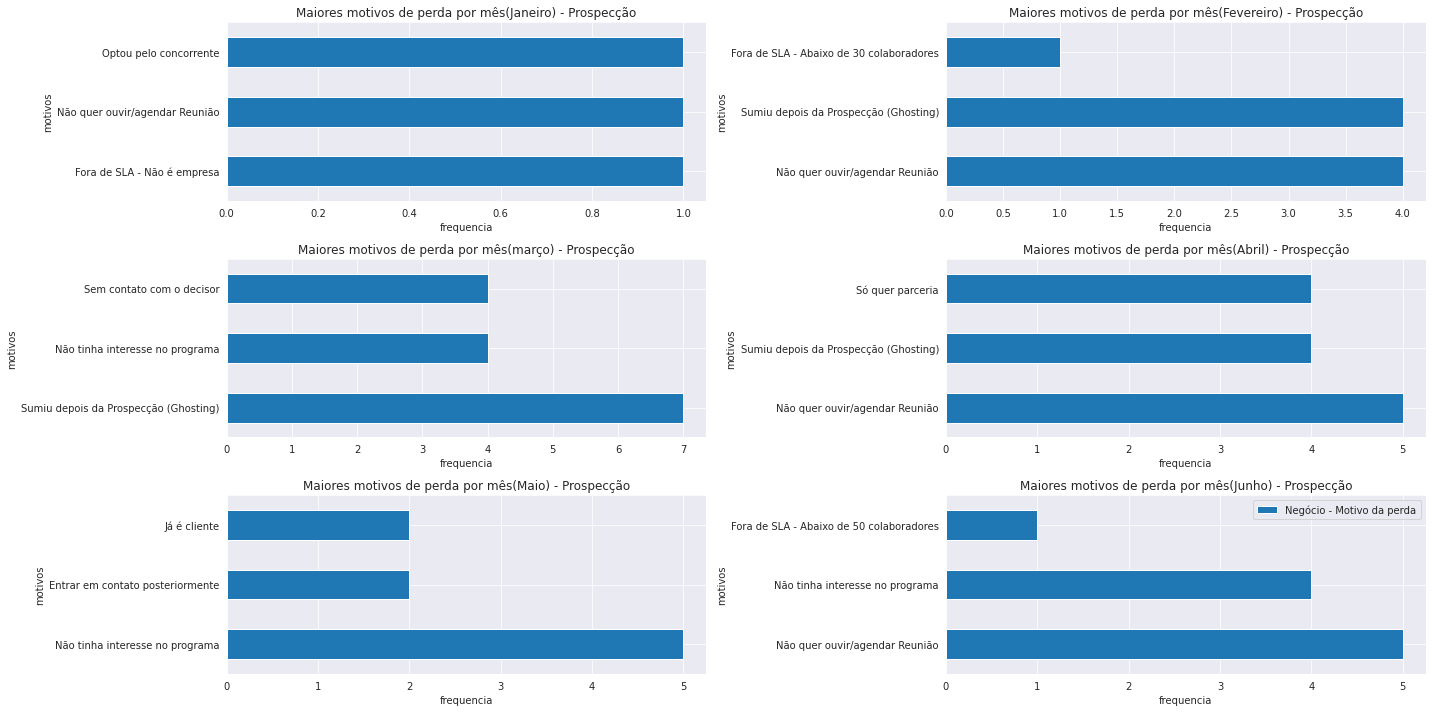

In [219]:
# plotar receita mensal.
fig, ((ax,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(20,10))


((df_pros['Negócio - Motivo da perda'].groupby(df_pros['mes - Data de perda'])).value_counts()[1][1:4]).plot(kind="barh", ax=ax)
((df_pros['Negócio - Motivo da perda'].groupby(df_pros['mes - Data de perda'])).value_counts()[2][1:4]).plot(kind="barh", ax=ax2)
((df_pros['Negócio - Motivo da perda'].groupby(df_pros['mes - Data de perda'])).value_counts()[3][1:4]).plot(kind="barh", ax=ax3)
((df_pros['Negócio - Motivo da perda'].groupby(df_pros['mes - Data de perda'])).value_counts()[4][1:4]).plot(kind="barh", ax=ax4)
((df_pros['Negócio - Motivo da perda'].groupby(df_pros['mes - Data de perda'])).value_counts()[5][1:4]).plot(kind="barh", ax=ax5)
((df_pros['Negócio - Motivo da perda'].groupby(df_pros['mes - Data de perda'])).value_counts()[6][1:4]).plot(kind="barh", ax=ax6)

ax.set_title("Maiores motivos de perda por mês(Janeiro) - Prospecção")
ax.set_xlabel("frequencia")
ax.set_ylabel("motivos")

ax2.set_title("Maiores motivos de perda por mês(Fevereiro) - Prospecção")
ax2.set_xlabel("frequencia")
ax2.set_ylabel("motivos")

ax3.set_title("Maiores motivos de perda por mês(março) - Prospecção")
ax3.set_xlabel("frequencia")
ax3.set_ylabel("motivos")

ax4.set_title("Maiores motivos de perda por mês(Abril) - Prospecção")
ax4.set_xlabel("frequencia")
ax4.set_ylabel("motivos")

ax5.set_title("Maiores motivos de perda por mês(Maio) - Prospecção")
ax5.set_xlabel("frequencia")
ax5.set_ylabel("motivos")

ax6.set_title("Maiores motivos de perda por mês(Junho) - Prospecção")
ax6.set_xlabel("frequencia")
ax6.set_ylabel("motivos")

plt.legend()
plt.tight_layout()

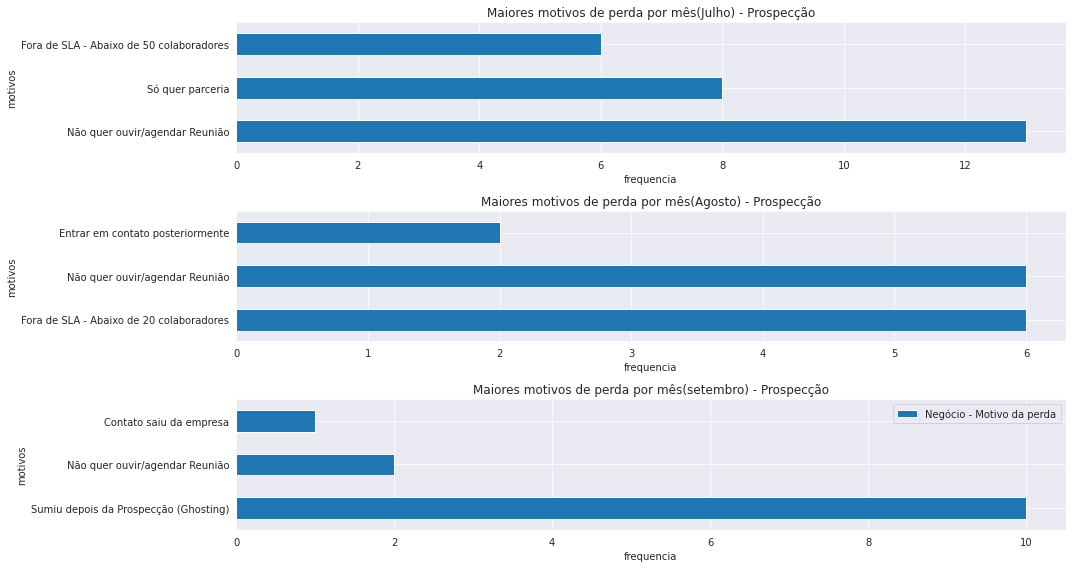

In [220]:
fig, ((ax7,ax8,ax9)) = plt.subplots(3,1,figsize=(15,8))

((df_pros['Negócio - Motivo da perda'].groupby(df_pros['mes - Data de perda'])).value_counts()[7][1:4]).plot(kind="barh", ax=ax7)
((df_pros['Negócio - Motivo da perda'].groupby(df_pros['mes - Data de perda'])).value_counts()[8][1:4]).plot(kind="barh", ax=ax8)
((df_pros['Negócio - Motivo da perda'].groupby(df_pros['mes - Data de perda'])).value_counts()[9][1:4]).plot(kind="barh", ax=ax9)

ax7.set_title("Maiores motivos de perda por mês(Julho) - Prospecção")
ax7.set_xlabel("frequencia")
ax7.set_ylabel("motivos")

ax8.set_title("Maiores motivos de perda por mês(Agosto) - Prospecção")
ax8.set_xlabel("frequencia")
ax8.set_ylabel("motivos")

ax9.set_title("Maiores motivos de perda por mês(setembro) - Prospecção")
ax9.set_xlabel("frequencia")
ax9.set_ylabel("motivos")

plt.legend()
plt.tight_layout()

> Nas celulas acima pode-se observar os principais motivos de desistência de realizar um projeto com a Vitalk na etapa `Prospecção` durante os `9 meses`. Observa-se que nem todas os meses tiverem 3 motivos como solicitado.

 #### 3.2.4 Reunião de Diagnóstico.

 > Vamos realizar o mesmo processo agora para a etapa de `Reunião de Diagnóstico`. Primeiro vamos selecionar os dados referentes somente a essa etapa. Em seguida vamos contabilizar os motivos de desistência para essa etapa em cada um dos meses.

In [221]:
df_diag = df_4[df_4['Negócio - Etapa']=='Reunião de Diagnóstico']
df_diag

,Negócio - Motivo da perda,mes - Data de perda,Negócio - Etapa
8,Só quer parceria,1.0,Reunião de Diagnóstico
15,Não é prioridade no momento,6.0,Reunião de Diagnóstico
25,NaN,NaN,Reunião de Diagnóstico
36,Só quer parceria,1.0,Reunião de Diagnóstico
42,Não é prioridade no momento,4.0,Reunião de Diagnóstico
43,NaN,NaN,Reunião de Diagnóstico
44,Fora de SLA - Abaixo de 50 colaboradores,4.0,Reunião de Diagnóstico
49,NaN,NaN,Reunião de Diagnóstico
60,Só quer parceria,1.0,Reunião de Diagnóstico
74,NaN,NaN,Reunião de Diagnóstico


In [222]:
(df_diag['Negócio - Motivo da perda'].groupby(df_diag['mes - Data de perda'])).value_counts()

mes - Data de perda  Negócio - Motivo da perda               
1.0                  Só quer parceria                            3
3.0                  Fora de Perfil                              1
4.0                  Fora de SLA - Abaixo de 50 colaboradores    1
                     Não é prioridade no momento                 1
                     Sem contato com a empresa                   1
5.0                  Estava procurando outra solução             1
                     Só quer parceria                            1
6.0                  Não é prioridade no momento                 1
7.0                  Entrar em contato posteriormente            1
8.0                  Entrar em contato posteriormente            2
                     Encontrou outra solução                     1
                     Não é prioridade no momento                 1
Name: Negócio - Motivo da perda, dtype: int64

> Acima vemos a verificação de que os dados foram selecionados corretamente. Obsevar-se que existem poucos dados relacionados a essa etapa.

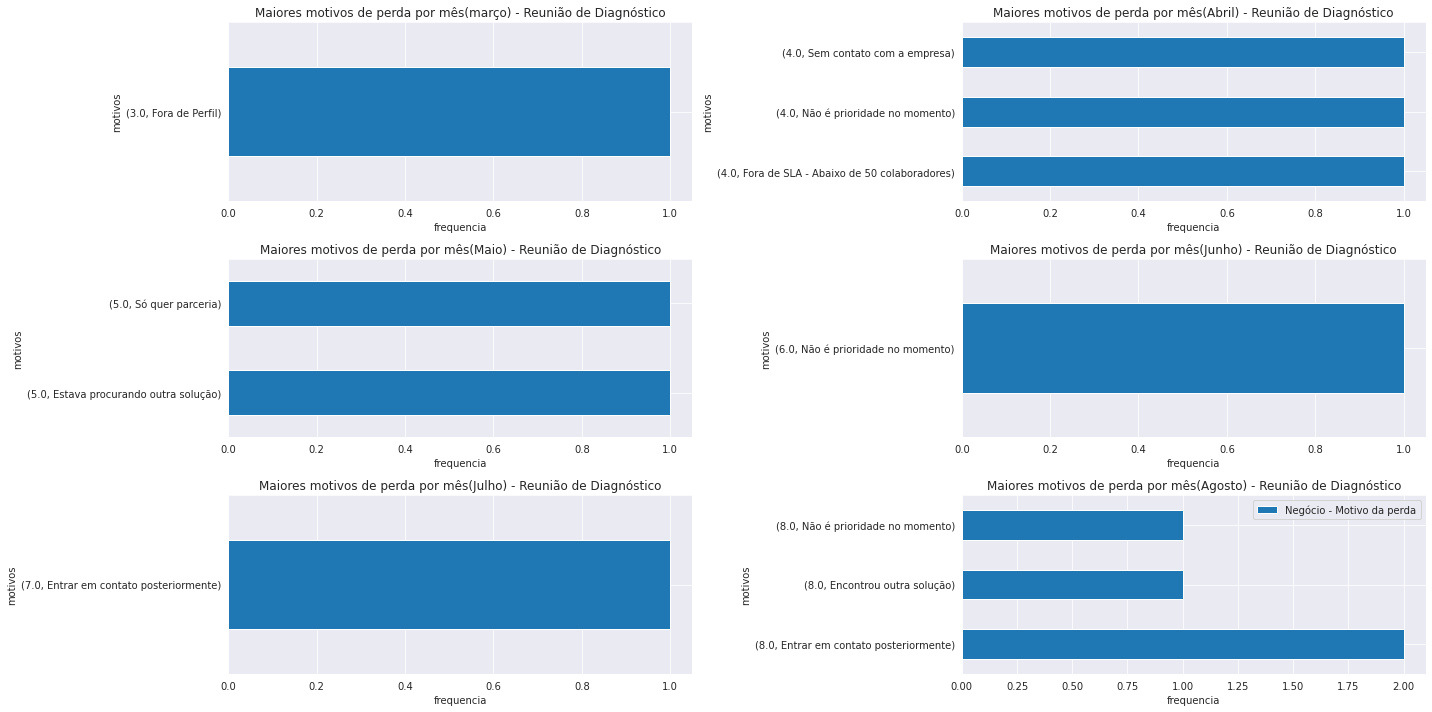

In [223]:
# plotar receita mensal.
fig, ((ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(3,2,figsize=(20,10))

((df_diag['Negócio - Motivo da perda'].groupby(df_diag['mes - Data de perda'])).value_counts()[1:2]).plot(kind="barh", ax=ax3)
((df_diag['Negócio - Motivo da perda'].groupby(df_diag['mes - Data de perda'])).value_counts()[2:5]).plot(kind="barh", ax=ax4)
((df_diag['Negócio - Motivo da perda'].groupby(df_diag['mes - Data de perda'])).value_counts()[5:7]).plot(kind="barh", ax=ax5)
((df_diag['Negócio - Motivo da perda'].groupby(df_diag['mes - Data de perda'])).value_counts()[7:8]).plot(kind="barh", ax=ax6)
((df_diag['Negócio - Motivo da perda'].groupby(df_diag['mes - Data de perda'])).value_counts()[8:9]).plot(kind="barh", ax=ax7)
((df_diag['Negócio - Motivo da perda'].groupby(df_diag['mes - Data de perda'])).value_counts()[9:12]).plot(kind="barh", ax=ax8)


ax3.set_title("Maiores motivos de perda por mês(março) - Reunião de Diagnóstico")
ax3.set_xlabel("frequencia")
ax3.set_ylabel("motivos")

ax4.set_title("Maiores motivos de perda por mês(Abril) - Reunião de Diagnóstico")
ax4.set_xlabel("frequencia")
ax4.set_ylabel("motivos")

ax5.set_title("Maiores motivos de perda por mês(Maio) - Reunião de Diagnóstico")
ax5.set_xlabel("frequencia")
ax5.set_ylabel("motivos")

ax6.set_title("Maiores motivos de perda por mês(Junho) - Reunião de Diagnóstico")
ax6.set_xlabel("frequencia")
ax6.set_ylabel("motivos")

ax7.set_title("Maiores motivos de perda por mês(Julho) - Reunião de Diagnóstico")
ax7.set_xlabel("frequencia")
ax7.set_ylabel("motivos")

ax8.set_title("Maiores motivos de perda por mês(Agosto) - Reunião de Diagnóstico")
ax8.set_xlabel("frequencia")
ax8.set_ylabel("motivos")

plt.legend()
plt.tight_layout()

> Nas celulas acima pode-se observar os principais motivos de desistência de realizar um projeto com a Vitalk na etapa `Reunião de Diagnostico` durante os `9 meses`. Observa-se que nem todas os meses tiverem 3 motivos como solicitado e nem todos os meses tiveram entradas.

#### 3.2.5 Apresentação da Solução.

>  Vamos realizar o mesmo processo agora para a etapa de `Apresentação da Solução`. Primeiro vamos selecionar os dados referentes somente a essa etapa. Em seguida vamos contabilizar os motivos de desistência para essa etapa em cada um dos meses.

In [224]:
df_pres = df_4[df_4['Negócio - Etapa']=='Apresentação da Solução']
df_pres

,Negócio - Motivo da perda,mes - Data de perda,Negócio - Etapa
9,Budget,6.0,Apresentação da Solução
24,Não é prioridade no momento,5.0,Apresentação da Solução
29,NaN,NaN,Apresentação da Solução
48,Sumiu depois da Prospecção (Ghosting),4.0,Apresentação da Solução
59,Não é prioridade no momento,7.0,Apresentação da Solução
...,...,...,...
1083,NaN,NaN,Apresentação da Solução
1104,NaN,NaN,Apresentação da Solução
1535,NaN,NaN,Apresentação da Solução
1652,NaN,NaN,Apresentação da Solução


In [225]:
(df_pres['Negócio - Motivo da perda'].groupby(df_pres['mes - Data de perda'])).value_counts()[7:8]

mes - Data de perda  Negócio - Motivo da perda  
8.0                  Não é prioridade no momento    1
Name: Negócio - Motivo da perda, dtype: int64

>Verificação das entradas carregadas, acima vemos exemplo do mês de `agosto`.

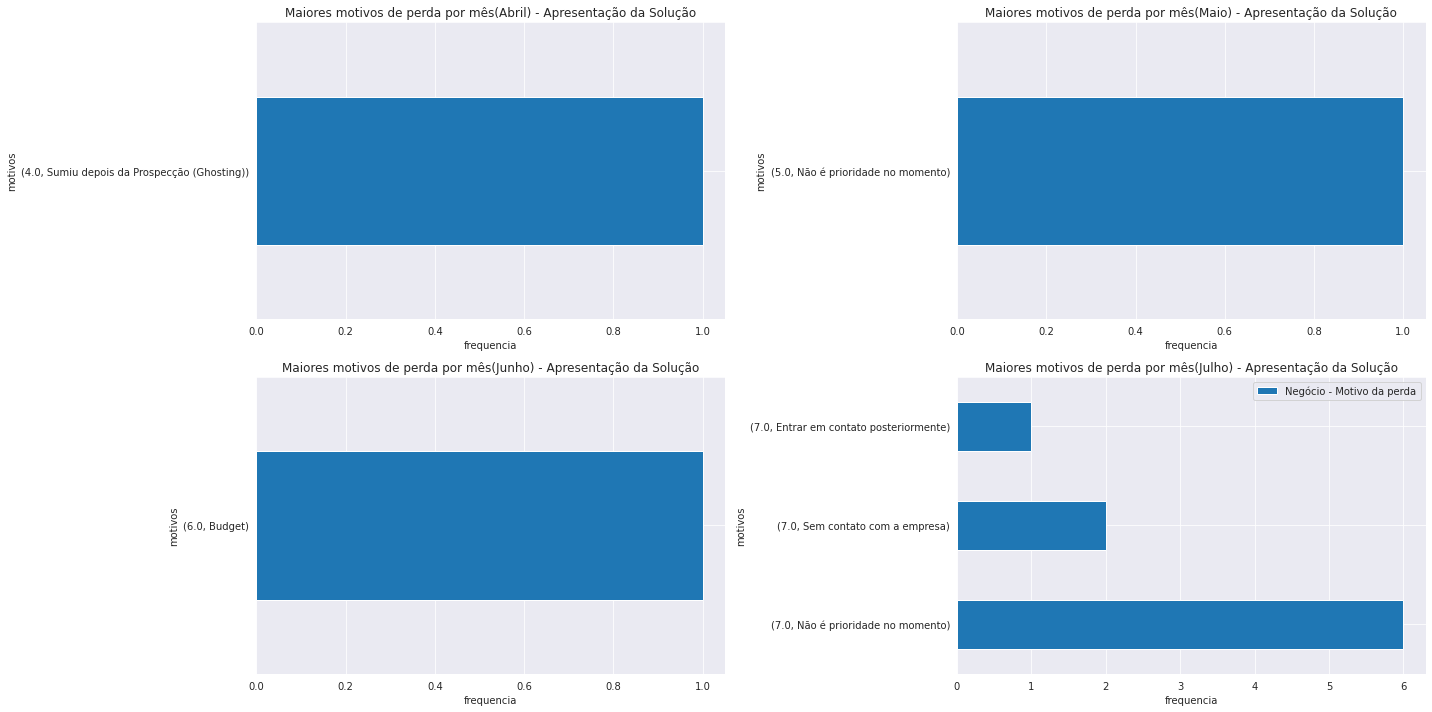

In [226]:
# plotar receita mensal.
fig, ((ax4,ax5),(ax6,ax7)) = plt.subplots(2,2,figsize=(20,10))

((df_pres['Negócio - Motivo da perda'].groupby(df_pres['mes - Data de perda'])).value_counts()[1:2]).plot(kind="barh", ax=ax4)
((df_pres['Negócio - Motivo da perda'].groupby(df_pres['mes - Data de perda'])).value_counts()[2:3]).plot(kind="barh", ax=ax5)
((df_pres['Negócio - Motivo da perda'].groupby(df_pres['mes - Data de perda'])).value_counts()[3:4]).plot(kind="barh", ax=ax6)
((df_pres['Negócio - Motivo da perda'].groupby(df_pres['mes - Data de perda'])).value_counts()[4:7]).plot(kind="barh", ax=ax7)



ax4.set_title("Maiores motivos de perda por mês(Abril) - Apresentação da Solução")
ax4.set_xlabel("frequencia")
ax4.set_ylabel("motivos")

ax5.set_title("Maiores motivos de perda por mês(Maio) - Apresentação da Solução")
ax5.set_xlabel("frequencia")
ax5.set_ylabel("motivos")

ax6.set_title("Maiores motivos de perda por mês(Junho) - Apresentação da Solução")
ax6.set_xlabel("frequencia")
ax6.set_ylabel("motivos")

ax7.set_title("Maiores motivos de perda por mês(Julho) - Apresentação da Solução")
ax7.set_xlabel("frequencia")
ax7.set_ylabel("motivos")

plt.legend()
plt.tight_layout()

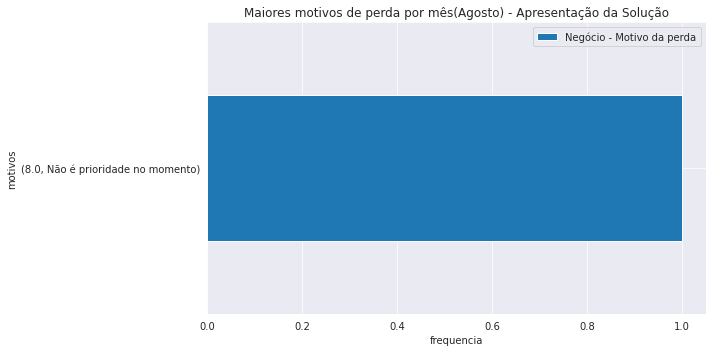

In [227]:
fig, ax8 = plt.subplots(figsize=(10,5))
((df_pres['Negócio - Motivo da perda'].groupby(df_pres['mes - Data de perda'])).value_counts()[7:8]).plot(kind="barh", ax=ax8)

ax8.set_title("Maiores motivos de perda por mês(Agosto) - Apresentação da Solução")
ax8.set_xlabel("frequencia")
ax8.set_ylabel("motivos")

plt.legend()
plt.tight_layout()

> Nas celulas acima pode-se observar os principais motivos de desistência de realizar um projeto com a Vitalk na etapa `Apresentação da Soluçã` durante os `9 meses`. Observa-se que nem todas os meses tiverem 3 motivos como solicitado e nem todos os meses tiveram entradas.

#### 3.2.6 Proposta Enviada.

>  Vamos realizar o mesmo processo agora para a etapa de `Proposta Enviada`. Primeiro vamos selecionar os dados referentes somente a essa etapa. Em seguida vamos contabilizar os motivos de desistência para essa etapa em cada um dos meses.

In [228]:
df_prop = df_4[df_4['Negócio - Etapa']=='Proposta Enviada']
df_prop

,Negócio - Motivo da perda,mes - Data de perda,Negócio - Etapa
12,NaN,NaN,Proposta Enviada
19,Sem contato com a empresa,5.0,Proposta Enviada
22,Budget,3.0,Proposta Enviada
78,Sumiu depois da proposta (Ghosting),3.0,Proposta Enviada
88,Sem contato com a empresa,7.0,Proposta Enviada
...,...,...,...
1631,NaN,NaN,Proposta Enviada
1650,NaN,NaN,Proposta Enviada
1651,NaN,NaN,Proposta Enviada
1663,NaN,NaN,Proposta Enviada


In [229]:
(df_prop['Negócio - Motivo da perda'].groupby(df_prop['mes - Data de perda'])).value_counts()[18:30]

mes - Data de perda  Negócio - Motivo da perda          
7.0                  Optou pelo concorrente                 1
8.0                  Optou pelo concorrente                 4
                     Diretoria não aprovou                  3
                     Sem contato com a empresa              3
                     Não é prioridade no momento            2
                     Encontrou outra solução                1
                     Estava procurando outra solução        1
                     Não tinha interesse no programa        1
                     Sumiu depois da proposta (Ghosting)    1
9.0                  Diretoria não aprovou                  2
                     Não é prioridade no momento            1
                     Optou pelo concorrente                 1
Name: Negócio - Motivo da perda, dtype: int64

> Acima temos o exemplo de carregamento correto dos dados. Exemplo de motivos apresentados nos meses `7, 8 e 9`.

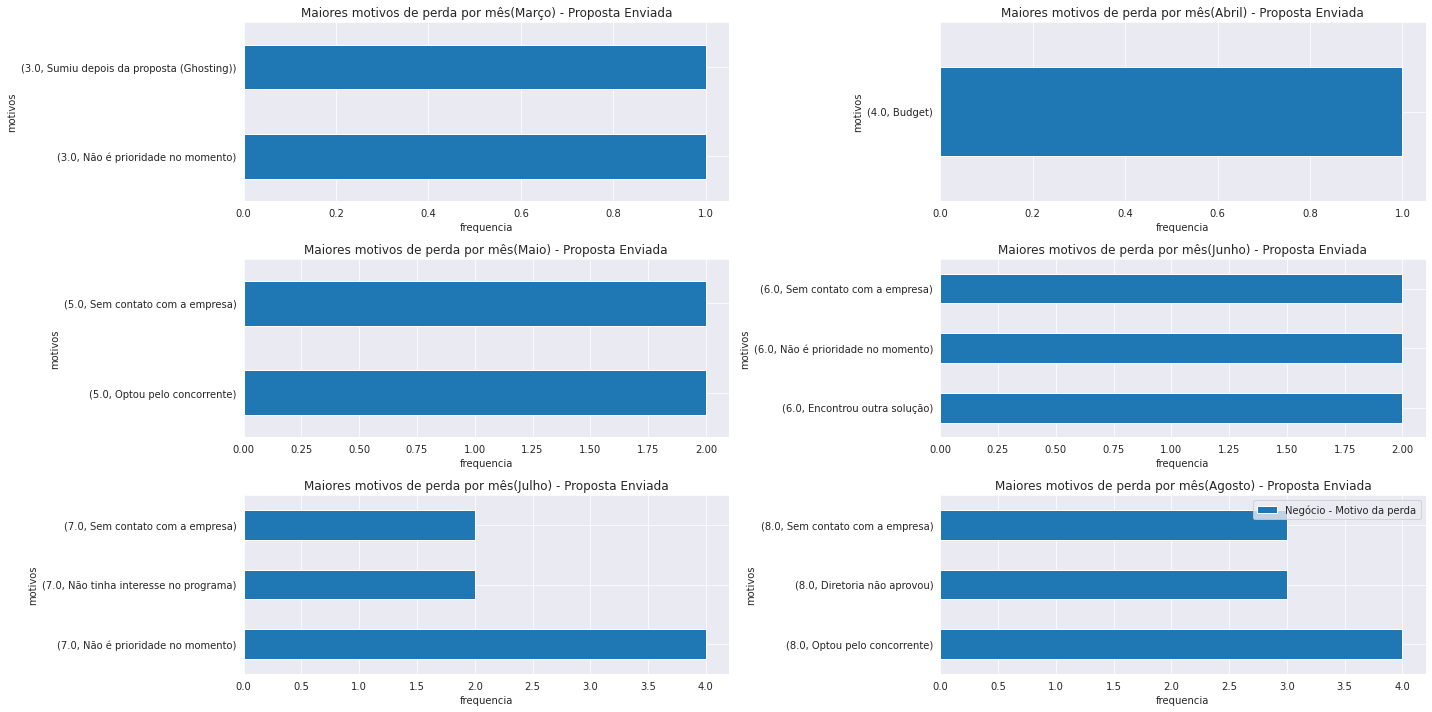

In [230]:
# plotar receita mensal.
fig, ((ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(3,2,figsize=(20,10))

((df_prop['Negócio - Motivo da perda'].groupby(df_prop['mes - Data de perda'])).value_counts()[1:3]).plot(kind="barh", ax=ax3)
((df_prop['Negócio - Motivo da perda'].groupby(df_prop['mes - Data de perda'])).value_counts()[3:4]).plot(kind="barh", ax=ax4)
((df_prop['Negócio - Motivo da perda'].groupby(df_prop['mes - Data de perda'])).value_counts()[4:6]).plot(kind="barh", ax=ax5)
((df_prop['Negócio - Motivo da perda'].groupby(df_prop['mes - Data de perda'])).value_counts()[6:9]).plot(kind="barh", ax=ax6)
((df_prop['Negócio - Motivo da perda'].groupby(df_prop['mes - Data de perda'])).value_counts()[12:15]).plot(kind="barh", ax=ax7)
((df_prop['Negócio - Motivo da perda'].groupby(df_prop['mes - Data de perda'])).value_counts()[19:22]).plot(kind="barh", ax=ax8)


ax3.set_title("Maiores motivos de perda por mês(Março) - Proposta Enviada")
ax3.set_xlabel("frequencia")
ax3.set_ylabel("motivos")

ax4.set_title("Maiores motivos de perda por mês(Abril) - Proposta Enviada")
ax4.set_xlabel("frequencia")
ax4.set_ylabel("motivos")

ax5.set_title("Maiores motivos de perda por mês(Maio) - Proposta Enviada")
ax5.set_xlabel("frequencia")
ax5.set_ylabel("motivos")

ax6.set_title("Maiores motivos de perda por mês(Junho) - Proposta Enviada")
ax6.set_xlabel("frequencia")
ax6.set_ylabel("motivos")

ax7.set_title("Maiores motivos de perda por mês(Julho) - Proposta Enviada")
ax7.set_xlabel("frequencia")
ax7.set_ylabel("motivos")

ax8.set_title("Maiores motivos de perda por mês(Agosto) - Proposta Enviada")
ax8.set_xlabel("frequencia")
ax8.set_ylabel("motivos")

plt.legend()
plt.tight_layout()

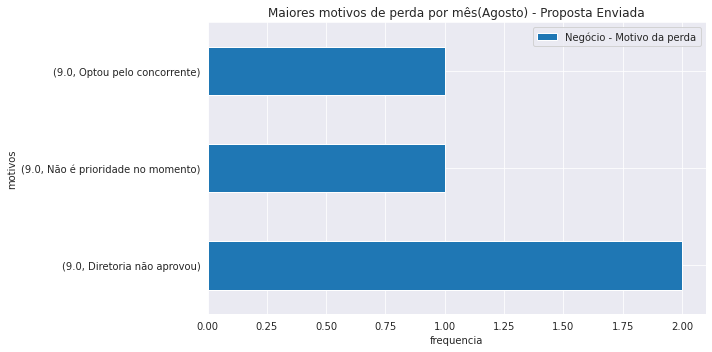

In [231]:
fig, ax9 = plt.subplots(figsize=(10,5))

((df_prop['Negócio - Motivo da perda'].groupby(df_prop['mes - Data de perda'])).value_counts()[27:30]).plot(kind="barh", ax=ax9)

ax9.set_title("Maiores motivos de perda por mês(Agosto) - Proposta Enviada")
ax9.set_xlabel("frequencia")
ax9.set_ylabel("motivos")

plt.legend()
plt.tight_layout()

> Nas celulas acima pode-se observar os principais motivos de desistência de realizar um projeto com a Vitalk na etapa `Proposta Enviada` durante os `9 meses`. Observa-se que nem todas os meses tiverem 3 motivos como solicitado e nem todos os meses tiveram entradas.

#### 3.2.7 Fechamento.

>  Vamos realizar o mesmo processo agora para a etapa de `Fechamento`. Primeiro vamos selecionar os dados referentes somente a essa etapa. Em seguida vamos contabilizar os motivos de desistência para essa etapa em cada um dos meses. Pulamos a etapa de `Negociação` pois essa não apresentou nenhum tipo entrada, ou seja nenhuma desistencia nessa etapa.

In [232]:
df_fec = df_4[df_4['Negócio - Etapa']=='Fechamento']
df_fec

,Negócio - Motivo da perda,mes - Data de perda,Negócio - Etapa
57,NaN,NaN,Fechamento
186,NaN,NaN,Fechamento
195,NaN,NaN,Fechamento
196,NaN,NaN,Fechamento
241,NaN,NaN,Fechamento
256,NaN,NaN,Fechamento
292,NaN,NaN,Fechamento
320,NaN,NaN,Fechamento
354,NaN,NaN,Fechamento
426,NaN,NaN,Fechamento


In [233]:
(df_fec['Negócio - Motivo da perda'].groupby(df_fec['mes - Data de perda'])).value_counts()

mes - Data de perda  Negócio - Motivo da perda       
6.0                  Optou pelo concorrente              1
7.0                  Sem contato com a empresa           1
8.0                  Encontrou outra solução             1
                     Entrar em contato posteriormente    1
Name: Negócio - Motivo da perda, dtype: int64

> Verificação dos dados. Pode-se notar que essa etapa possui poucas entradas e os dados foram selecionados corretamente.

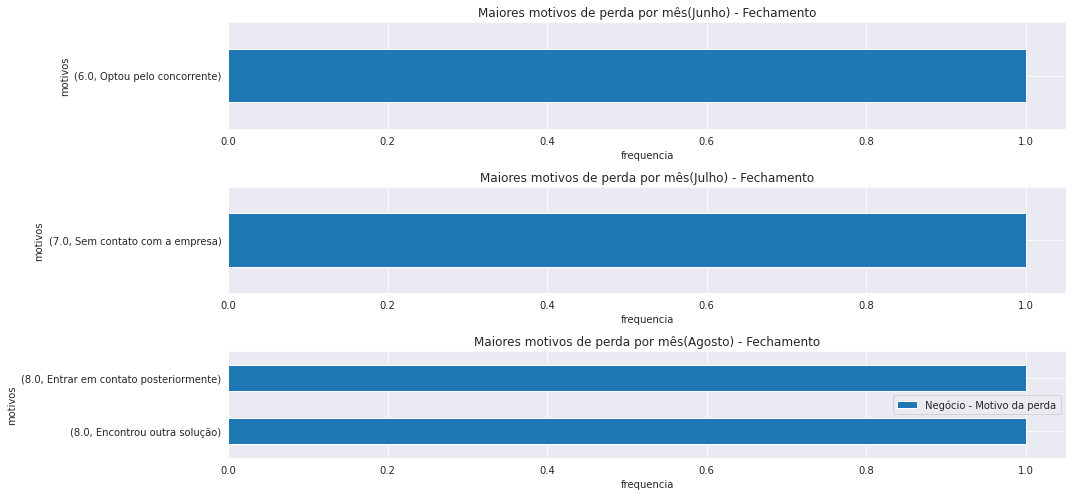

In [234]:
# plotar receita mensal.
fig, (ax6,ax7,ax8) = plt.subplots(3,1,figsize=(15,7))

((df_fec['Negócio - Motivo da perda'].groupby(df_fec['mes - Data de perda'])).value_counts()[0:1]).plot(kind="barh", ax=ax6)
((df_fec['Negócio - Motivo da perda'].groupby(df_fec['mes - Data de perda'])).value_counts()[1:2]).plot(kind="barh", ax=ax7)
((df_fec['Negócio - Motivo da perda'].groupby(df_fec['mes - Data de perda'])).value_counts()[2:4]).plot(kind="barh", ax=ax8)

ax6.set_title("Maiores motivos de perda por mês(Junho) - Fechamento")
ax6.set_xlabel("frequencia")
ax6.set_ylabel("motivos")

ax7.set_title("Maiores motivos de perda por mês(Julho) - Fechamento")
ax7.set_xlabel("frequencia")
ax7.set_ylabel("motivos")

ax8.set_title("Maiores motivos de perda por mês(Agosto) - Fechamento")
ax8.set_xlabel("frequencia")
ax8.set_ylabel("motivos")

plt.legend()
plt.tight_layout()

> Nas celulas acima pode-se observar os principais motivos de desistência de realizar um projeto com a Vitalk na etapa `Fechamento` durante os `9 meses`. Observa-se que nem todas os meses tiverem 3 motivos como solicitado e nem todos os meses tiveram entradas.

#### 3.2.8 Maturação.

>  Vamos realizar o mesmo processo agora para a etapa de `Maturação`. Primeiro vamos selecionar os dados referentes somente a essa etapa. Em seguida vamos contabilizar os motivos de desistência para essa etapa em cada um dos meses.

In [235]:
df_mat = df_4[df_4['Negócio - Etapa']=='Maturação']
df_mat

,Negócio - Motivo da perda,mes - Data de perda,Negócio - Etapa
4,Encontrou outra solução,7.0,Maturação
5,Encontrou outra solução,6.0,Maturação
7,Sem contato com a empresa,7.0,Maturação
10,Não é prioridade no momento,2.0,Maturação
11,Não é prioridade no momento,7.0,Maturação
...,...,...,...
1556,NaN,NaN,Maturação
1569,NaN,NaN,Maturação
1570,NaN,NaN,Maturação
1577,NaN,NaN,Maturação


In [236]:
(df_mat['Negócio - Motivo da perda'].groupby(df_mat['mes - Data de perda'])).value_counts()[1:15]

mes - Data de perda  Negócio - Motivo da perda          
3.0                  Não é prioridade no momento            1
                     Sumiu depois da proposta (Ghosting)    1
4.0                  Não é prioridade no momento            1
                     Optou pelo concorrente                 1
6.0                  Não tinha interesse no programa        2
                     Encontrou outra solução                1
                     Não é prioridade no momento            1
                     Sem contato com a empresa              1
7.0                  Não é prioridade no momento            8
                     Sumiu depois da proposta (Ghosting)    8
                     Diretoria não aprovou                  3
                     Optou pelo concorrente                 3
                     Contato saiu da empresa                2
                     Encontrou outra solução                2
Name: Negócio - Motivo da perda, dtype: int64

> Acima podemos ver que os dados foram selecionados corretamente.

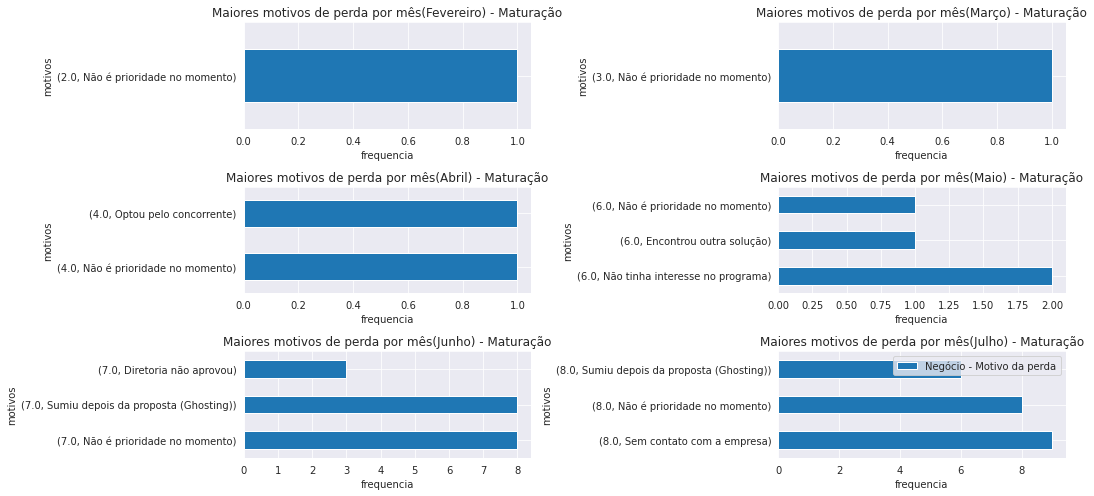

In [237]:
# plotar receita mensal.
fig, ((ax2,ax3),(ax4,ax6),(ax7,ax8)) = plt.subplots(3,2,figsize=(15,7))

((df_mat['Negócio - Motivo da perda'].groupby(df_mat['mes - Data de perda'])).value_counts()[0:1]).plot(kind="barh", ax=ax2)
((df_mat['Negócio - Motivo da perda'].groupby(df_mat['mes - Data de perda'])).value_counts()[1:2]).plot(kind="barh", ax=ax3)
((df_mat['Negócio - Motivo da perda'].groupby(df_mat['mes - Data de perda'])).value_counts()[3:5]).plot(kind="barh", ax=ax4)
((df_mat['Negócio - Motivo da perda'].groupby(df_mat['mes - Data de perda'])).value_counts()[5:8]).plot(kind="barh", ax=ax6)
((df_mat['Negócio - Motivo da perda'].groupby(df_mat['mes - Data de perda'])).value_counts()[9:12]).plot(kind="barh", ax=ax7)
((df_mat['Negócio - Motivo da perda'].groupby(df_mat['mes - Data de perda'])).value_counts()[21:24]).plot(kind="barh", ax=ax8)

ax2.set_title("Maiores motivos de perda por mês(Fevereiro) - Maturação")
ax2.set_xlabel("frequencia")
ax2.set_ylabel("motivos")

ax3.set_title("Maiores motivos de perda por mês(Março) - Maturação")
ax3.set_xlabel("frequencia")
ax3.set_ylabel("motivos")

ax4.set_title("Maiores motivos de perda por mês(Abril) - Maturação")
ax4.set_xlabel("frequencia")
ax4.set_ylabel("motivos")

ax6.set_title("Maiores motivos de perda por mês(Maio) - Maturação")
ax6.set_xlabel("frequencia")
ax6.set_ylabel("motivos")

ax7.set_title("Maiores motivos de perda por mês(Junho) - Maturação")
ax7.set_xlabel("frequencia")
ax7.set_ylabel("motivos")

ax8.set_title("Maiores motivos de perda por mês(Julho) - Maturação")
ax8.set_xlabel("frequencia")
ax8.set_ylabel("motivos")

plt.legend()
plt.tight_layout()

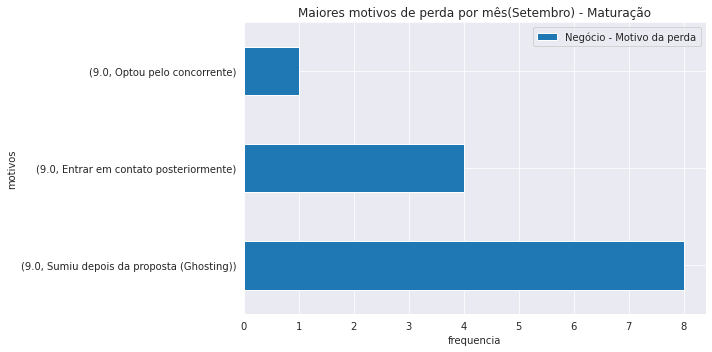

In [238]:
fig, ax9 = plt.subplots(figsize=(10,5))

((df_mat['Negócio - Motivo da perda'].groupby(df_mat['mes - Data de perda'])).value_counts()[35:38]).plot(kind="barh", ax=ax9)

ax9.set_title("Maiores motivos de perda por mês(Setembro) - Maturação")
ax9.set_xlabel("frequencia")
ax9.set_ylabel("motivos")

plt.legend()
plt.tight_layout()

> Nas celulas acima pode-se observar os principais motivos de desistência de realizar um projeto com a Vitalk na etapa `Maturação` durante os `9 meses`. Observa-se que nem todas os meses tiverem 3 motivos como solicitado e nem todos os meses tiveram entradas.

### 4. Conclusão e *Insights*.

> Tendo finalizado as questões vamos retomar os principais *insights* obtidos durante a análise:

* Como pode-se observar no gráfico de negócios criados houve um pico durante o mês de Agosto(mais de 500 novos negócios), demonstrando maior atividade.

* Podemos observar que durante quase todos os meses o setor de `TI` foi o que mais relizou projetos, além disso foi o unico que realizou projetos no mês de `setembro`. Em contra partida o setor `financeiro` realizou menos projetos, porém teve uma grande crescente a partir de `maio`.

* Como pudemos observar, o gráfico de cargos seguiu o comportamento do gráfico de negócios criados e dos setores mais frequentes, isso se deve por causa do aumento de projetos, quanto mais, projetos, mais setores e *leads* estarão envolvidos, assim sendo tendo o pico de atividade máxima em `agosto`. Neste gráfico o principal cargo representado foi `Analista de RH` com mais de `300 recorrencias`.

* Como pudemos observar que no gráfico de projetos fechados por mês, o mês que teve maior volume de projetos fechados foi o de `Agosto`, com `6 negócios fechados`. Em contra partida os mês `setembro` foi os mês com **menos** negócios fechados totalizando apenas 1. `janeiro` e `abril` não contabilizaram negócios fechados.

* Como era de se esperar devido ao gráfico de projetos fechados por mês, o mês de `agosto` que teve o maior número de negócios fechados, possui a maior renda, superandos os `6 mil reais`

* `Outros`, que são mistura de alguns outros setores, foram os maiores compradores da Vitalk com um valor superior a `5 mil reais`, seguidos por `TI`,`Varejo` e `Comercio`.

* Quando olhamos para o número de projetos contratados observa-se que o setor de `TI` passa a frente de `Outros`, como maior contrante da vitalk, assim assumindo a primeira posição.

* O gráfico de perdas seguiu o padrão esperado, uma vez que o maior volume de contatos com os *leads* foi no mês de agosto. Maior volume de *leads*, representa mais cargos, mais setores, maiores ganhos, mas também maiores perdas, lembrando que o precesso de vendas se trata de um "funil de vendas".

* Podemos ver que durante os `9 meses`, o unico momento que houve maior número de perdas do que projetos criados foi em `setembro`. Em `Abril` foram criados 
**100%** mais projetos do que foram perdidos, ou seja o dobro.

* Com relação aos motivos de desistência em cada uma das etapas cabe uma análise mais criteriosa do gestor em questão para decisões acertivas, devido a isso não será realizada nenhuma sugestão sobre o tema.